In [2]:
import sys
sys.path.append('../src')
from cleaning import load_and_clean_all_reddit_posts, load_and_clean_all_reddit_comments

# Load and clean ALL posts and comments from all subreddits
reddit_posts = load_and_clean_all_reddit_posts("../Data/Reddit")
reddit_comments = load_and_clean_all_reddit_comments("../Data/Reddit")

print("Total posts:", len(reddit_posts))
print("Total comments:", len(reddit_comments))


Total posts: 68047
Total comments: 889153


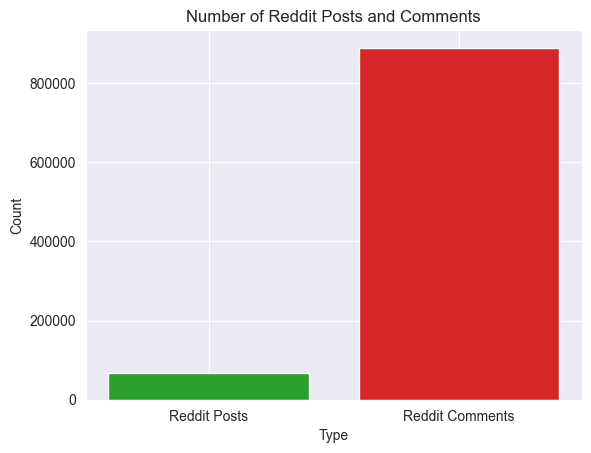

In [3]:
import matplotlib.pyplot as plt

counts = [len(reddit_posts), len(reddit_comments)]
labels = ['Reddit Posts', 'Reddit Comments']
colors = ['#2ca02c', '#d62728']  # Green and Red

plt.bar(labels, counts, color=colors)
plt.title('Number of Reddit Posts and Comments')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

## Data Overview

After loading the raw Reddit dataset, we obtained:

- **Total posts:** 67,926
- **Total comments:** 836,812



In [6]:
print(reddit_posts.columns.tolist())

['post_id', 'content', 'author', 'date', 'category', 'num_comments', 'score', 'upvote_ratio', 'url']


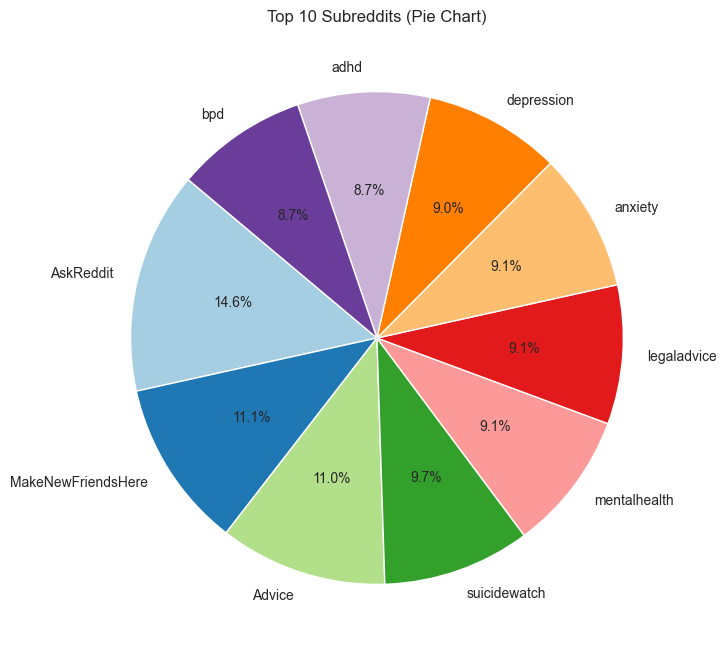

In [7]:
import matplotlib.pyplot as plt

top_subreddits = reddit_posts['category'].value_counts().head(10)

plt.figure(figsize=(8,8))
plt.pie(top_subreddits, labels=top_subreddits.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Top 10 Subreddits (Pie Chart)')
plt.show()

In [8]:
# Reddit
reddit_posts_before_count = len(reddit_posts)
reddit_comments_before_count = len(reddit_comments)

In [20]:
print("Posts columns:", reddit_posts.columns)
print("Comments columns:", reddit_comments.columns)
print("\nSample posts:\n", reddit_posts.head())
print("\nSample comments:\n", reddit_comments.head())

Posts columns: Index(['post_id', 'content', 'author', 'date', 'category', 'num_comments',
       'score', 'upvote_ratio', 'url'],
      dtype='object')
Comments columns: Index(['comment_id', 'post_id', 'content', 'author', 'date', 'order', 'score',
       'parent_id', 'link_id', 'permalink'],
      dtype='object')

Sample posts:
    post_id                                            content  \
0  1m1puv4  is she sabotaging things i dont know what to d...   
1  1m1osj2  i just crave the silence all i crave is silenc...   
2  1m1nymh  being an addict around worse addicts 18 uk  i ...   
3  1m1ng2l  how to overcome any type on addiction  for the...   
4  1m1k697  found zyn in my dads drawer accidentally what ...   

                 author                      date   category  num_comments  \
0              Artistlk 2025-07-16 21:57:52+00:00  addiction             0   
1  Exciting-Parsley-476 2025-07-16 21:14:59+00:00  addiction             1   
2  Particular-Truck7897 2025-07-16 20:42:13

In [21]:
print("Raw posts:", len(reddit_posts))
print("Raw comments:", len(reddit_comments))

Raw posts: 68047
Raw comments: 889153


In [22]:
# Check for duplicate post IDs
duplicate_post_ids = reddit_posts['post_id'].duplicated().sum()
print(f"Duplicate post IDs: {duplicate_post_ids}")

# Check for duplicate comment IDs
duplicate_comment_ids = reddit_comments['comment_id'].duplicated().sum()
print(f"Duplicate comment IDs: {duplicate_comment_ids}")

Duplicate post IDs: 0
Duplicate comment IDs: 0


In [23]:
reddit_posts = reddit_posts.drop_duplicates(subset=['post_id']).reset_index(drop=True)
reddit_comments = reddit_comments.drop_duplicates(subset=['comment_id']).reset_index(drop=True)
print("Posts after removing duplicates:", len(reddit_posts))
print("Comments after removing duplicates:", len(reddit_comments))

Posts after removing duplicates: 68047
Comments after removing duplicates: 889153


In [24]:
# For posts
empty_posts = reddit_posts['content'].str.strip() == ''
short_posts = reddit_posts['content'].str.len() < 10
print(f"Empty posts: {empty_posts.sum()}")
print(f"Very short posts (<10 chars): {short_posts.sum()}")

# For comments
empty_comments = reddit_comments['content'].str.strip() == ''
short_comments = reddit_comments['content'].str.len() < 10
print(f"Empty comments: {empty_comments.sum()}")
print(f"Very short comments (<10 chars): {short_comments.sum()}")

Empty posts: 20
Very short posts (<10 chars): 91
Empty comments: 3420
Very short comments (<10 chars): 48216


In [25]:
posts_empty = reddit_posts['content'].str.strip().str.len() <= 10
comments_empty = reddit_comments['content'].str.strip().str.len() <= 10
print(f"Posts to remove (empty/short): {posts_empty.sum()}")
print(f"Comments to remove (empty/short): {comments_empty.sum()}")

reddit_posts = reddit_posts[~posts_empty].reset_index(drop=True)
reddit_comments = reddit_comments[~comments_empty].reset_index(drop=True)
print("Posts shape after removing short/empty:", reddit_posts.shape)
print("Comments shape after removing short/empty:", reddit_comments.shape)

Posts to remove (empty/short): 121
Comments to remove (empty/short): 52341
Posts shape after removing short/empty: (67926, 9)
Comments shape after removing short/empty: (836812, 10)


In [26]:
print("Posts nulls:\n", reddit_posts.isnull().sum())
print("Comments nulls:\n", reddit_comments.isnull().sum())
print("Posts duplicate IDs:", reddit_posts.duplicated(subset=['post_id']).sum())
print("Comments duplicate IDs:", reddit_comments.duplicated(subset=['comment_id']).sum())
print("Posts with '[deleted]' or '[removed]':", reddit_posts['content'].isin(['[deleted]', '[removed]']).sum())
print("Comments with '[deleted]' or '[removed]':", reddit_comments['content'].isin(['[deleted]', '[removed]']).sum())
print("Sample cleaned posts:\n", reddit_posts['content'].sample(3))
print("Sample cleaned comments:\n", reddit_comments['content'].sample(3))

Posts nulls:
 post_id         0
content         0
author          0
date            0
category        0
num_comments    0
score           0
upvote_ratio    0
url             0
dtype: int64
Comments nulls:
 comment_id    0
post_id       0
content       0
author        0
date          0
order         0
score         0
parent_id     0
link_id       0
permalink     0
dtype: int64
Posts duplicate IDs: 0
Comments duplicate IDs: 0
Posts with '[deleted]' or '[removed]': 0
Comments with '[deleted]' or '[removed]': 0
Sample cleaned posts:
 1167     feeling empty without a hyperfixation earlier ...
56276    m23 met a girl who is 10years older and has ki...
6738     how do you handle switching barbers within the...
Name: content, dtype: object
Sample cleaned comments:
 88552     1 the false belief that boysmen always want se...
756575    not odd at all  im just an estimator now but w...
833091                                 no no no three weeks
Name: content, dtype: object


In [27]:
import re
import html

def advanced_clean(text):
    text = str(text).lower().strip()
    text = html.unescape(text)
    text = re.sub(r'http\S+|www\S+', '', text)  # Remove URLs
    text = re.sub(r'\*\*(.*?)\*\*|\*(.*?)\*', '', text)  # Remove markdown
    text = re.sub(r'\[(.*?)\]\(.*?\)', '', text)  # Remove markdown links
    text = re.sub(r'!?\[(.*?)\]\(.*?\)', '', text)  # Remove image markdown
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'(.)\1{3,}', r'\1\1', text)  # Limit excessive repeated chars
    text = re.sub(r'!{2,}', '!', text)  # Limit exclamation marks
    text = re.sub(r'[^a-z0-9\s.,!?]', '', text)  # Remove special chars except basic punctuation
    text = re.sub(r'\s+', ' ', text)  # Normalize whitespace
    return text

reddit_posts['content'] = reddit_posts['content'].apply(advanced_clean)
reddit_comments['content'] = reddit_comments['content'].apply(advanced_clean)
print("Sample posts after advanced cleaning:\n", reddit_posts['content'].sample(3))
print("Sample comments after advanced cleaning:\n", reddit_comments['content'].sample(3))

Sample posts after advanced cleaning:
 67624    i was in local shop on friday night and i spot...
10024    what worked for you if you had a dry flaky sca...
26423     semiconductors overtake oil as chinas top import
Name: content, dtype: object
Sample comments after advanced cleaning:
 15369     hi uwhatwonderfulbows and thanks for posting o...
191879    its common for us to think they are happy with...
7488      urine test would be better but i mean without ...
Name: content, dtype: object


In [28]:
reddit_posts.to_csv('reddit_posts_clean_final.csv', index=False)
reddit_comments.to_csv('reddit_comments_clean_final.csv', index=False)
print("Saved cleaned posts and comments to CSV.")

Saved cleaned posts and comments to CSV.


In [29]:
print(f"Final number of posts: {len(reddit_posts)}")
print(f"Final number of comments: {len(reddit_comments)}")

Final number of posts: 67926
Final number of comments: 836812


# Data is fully cleaned and saved. Ready for EDA and modeling.

# EDA


In [10]:
# 1. Data Overview: Show number of posts/comments and columns
import pandas as pd

reddit_posts = pd.read_csv("reddit_posts_clean_final.csv")
reddit_comments = pd.read_csv("reddit_comments_clean_final.csv")

print(f"Total posts: {len(reddit_posts)}")
print(f"Total comments: {len(reddit_comments)}")
print("Posts columns:", reddit_posts.columns.tolist())
print("Comments columns:", reddit_comments.columns.tolist())
print("Sample posts:\n", reddit_posts.head())
print("Sample comments:\n", reddit_comments.head())

Total posts: 67926
Total comments: 836812
Posts columns: ['post_id', 'content', 'author', 'date', 'category', 'num_comments', 'score', 'upvote_ratio', 'url']
Comments columns: ['comment_id', 'post_id', 'content', 'author', 'date', 'order', 'score', 'parent_id', 'link_id', 'permalink']
Sample posts:
    post_id                                            content  \
0  1m1puv4  is she sabotaging things i dont know what to d...   
1  1m1osj2  i just crave the silence all i crave is silenc...   
2  1m1nymh  being an addict around worse addicts 18 uk i w...   
3  1m1ng2l  how to overcome any type on addiction for the ...   
4  1m1k697  found zyn in my dads drawer accidentally what ...   

                 author                       date   category  num_comments  \
0              Artistlk  2025-07-16 21:57:52+00:00  addiction             0   
1  Exciting-Parsley-476  2025-07-16 21:14:59+00:00  addiction             1   
2  Particular-Truck7897  2025-07-16 20:42:13+00:00  addiction          

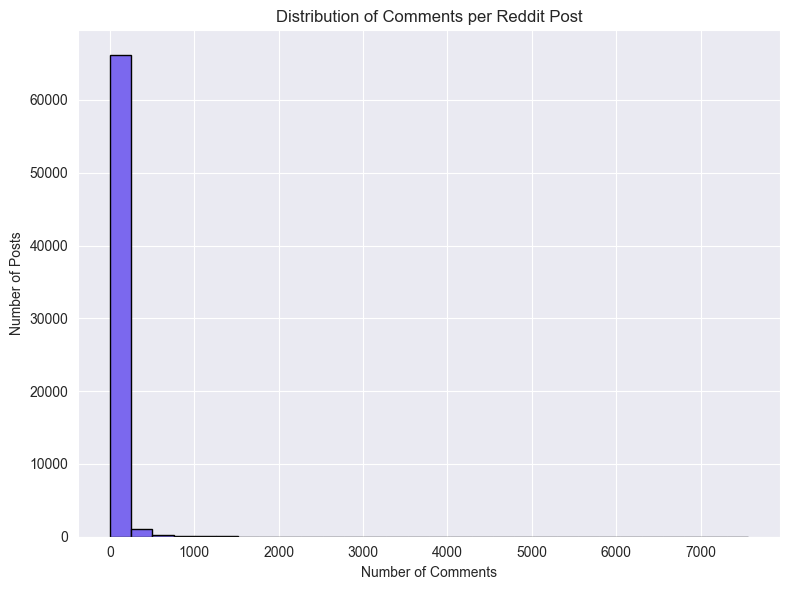

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.hist(reddit_posts['num_comments'], bins=30, color='mediumslateblue', edgecolor='black')
plt.title('Distribution of Comments per Reddit Post')
plt.xlabel('Number of Comments')
plt.ylabel('Number of Posts')
plt.tight_layout()
plt.show()

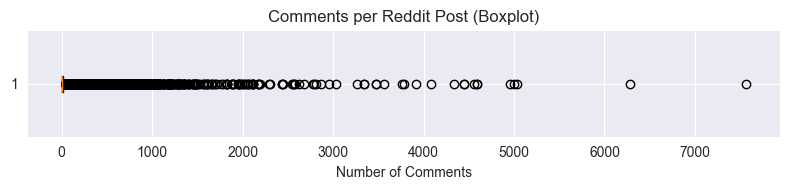

In [12]:
plt.figure(figsize=(8,2))
plt.boxplot(reddit_posts['num_comments'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightcoral'))
plt.title('Comments per Reddit Post (Boxplot)')
plt.xlabel('Number of Comments')
plt.tight_layout()
plt.show()

C:\Users\aipro\AppData\Local\Temp\ipykernel_25308\674282181.py:7: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  posts_monthly = reddit_posts.groupby(reddit_posts['date'].dt.to_period('M')).size()


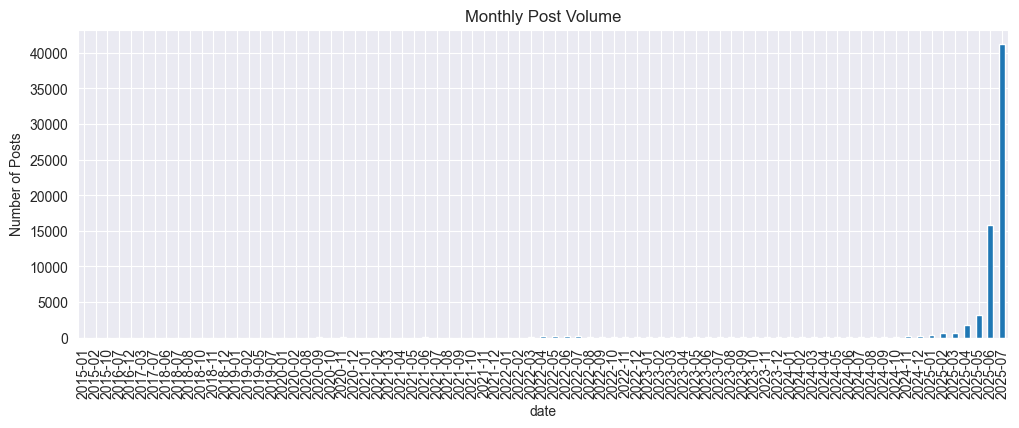

C:\Users\aipro\AppData\Local\Temp\ipykernel_25308\674282181.py:12: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  comments_monthly = reddit_comments.groupby(reddit_comments['date'].dt.to_period('M')).size()


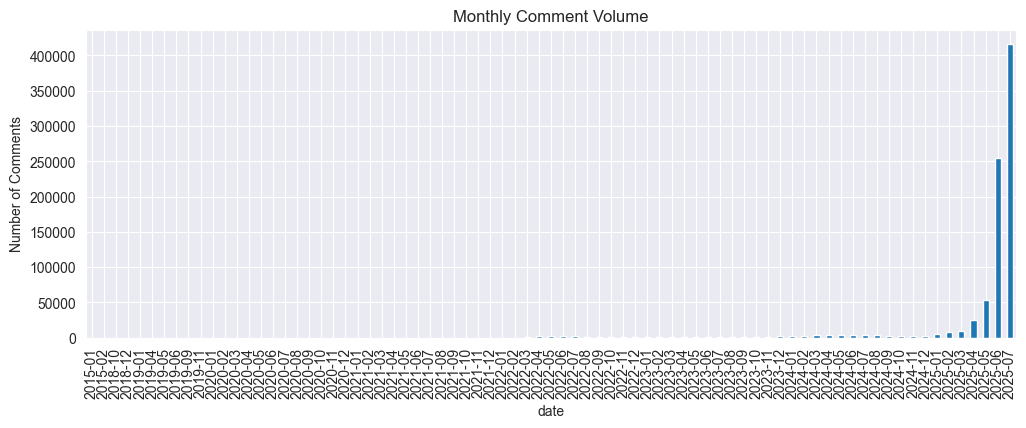

In [31]:
# 2. Temporal Trends: Plot monthly post/comment counts
import matplotlib.pyplot as plt

reddit_posts['date'] = pd.to_datetime(reddit_posts['date'], errors='coerce')
reddit_comments['date'] = pd.to_datetime(reddit_comments['date'], errors='coerce')

posts_monthly = reddit_posts.groupby(reddit_posts['date'].dt.to_period('M')).size()
posts_monthly.plot(kind='bar', figsize=(12,4), title='Monthly Post Volume')
plt.ylabel('Number of Posts')
plt.show()

comments_monthly = reddit_comments.groupby(reddit_comments['date'].dt.to_period('M')).size()
comments_monthly.plot(kind='bar', figsize=(12,4), title='Monthly Comment Volume')
plt.ylabel('Number of Comments')
plt.show()

C:\Users\aipro\AppData\Local\Temp\ipykernel_25308\3934135217.py:8: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  posts_monthly = reddit_posts.groupby(reddit_posts['date'].dt.to_period('M')).size()
C:\Users\aipro\AppData\Local\Temp\ipykernel_25308\3934135217.py:9: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  comments_monthly = reddit_comments.groupby(reddit_comments['date'].dt.to_period('M')).size()


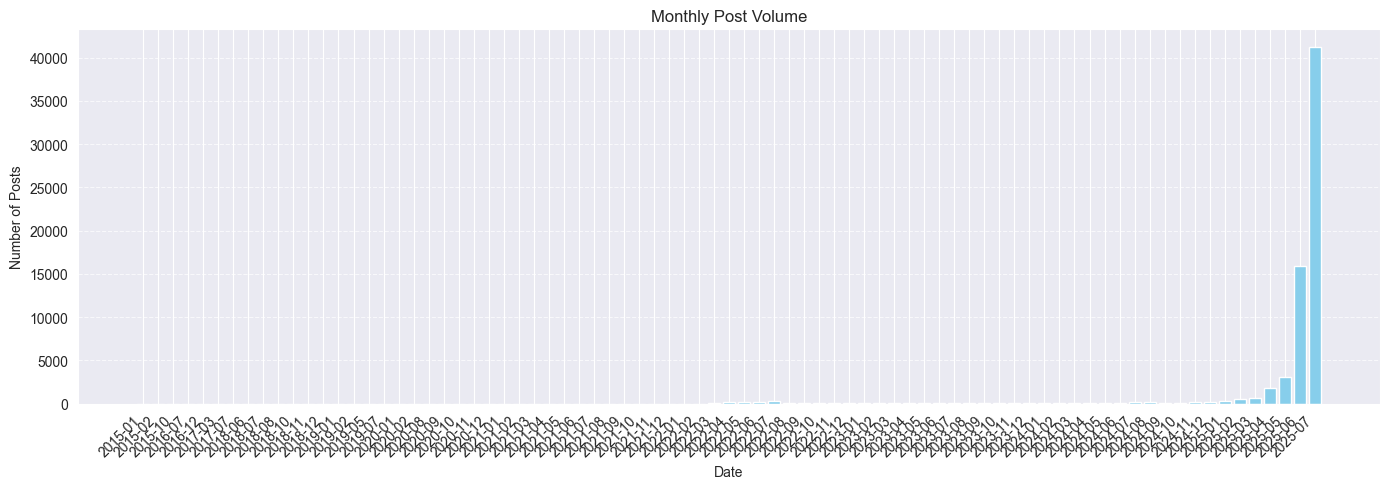

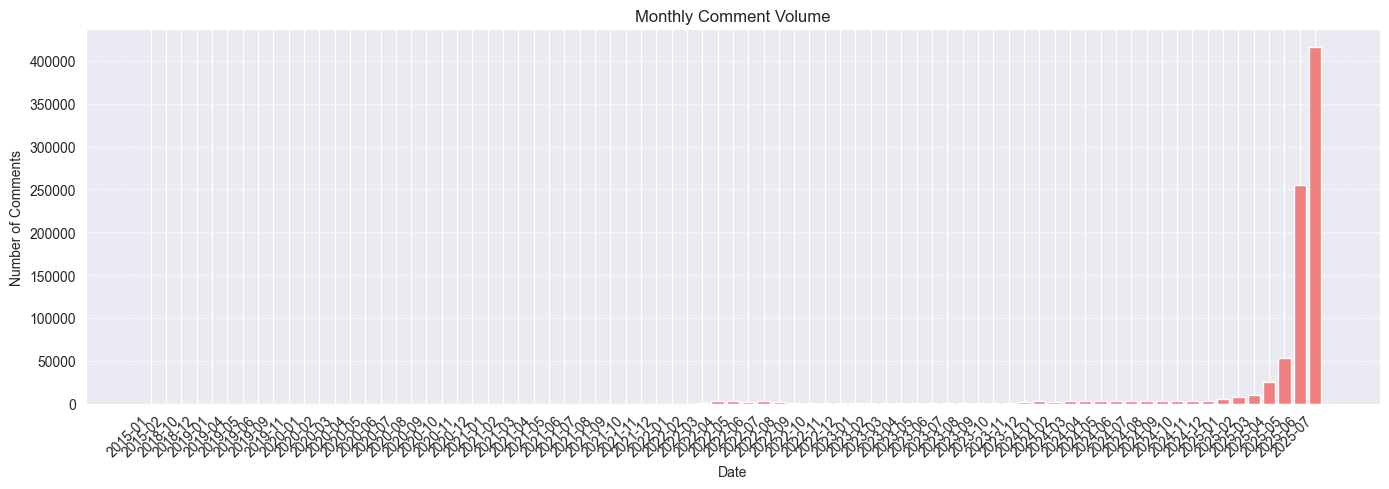

In [33]:
import matplotlib.pyplot as plt

# Ensure date columns are datetime
reddit_posts['date'] = pd.to_datetime(reddit_posts['date'], errors='coerce')
reddit_comments['date'] = pd.to_datetime(reddit_comments['date'], errors='coerce')

# Group by month
posts_monthly = reddit_posts.groupby(reddit_posts['date'].dt.to_period('M')).size()
comments_monthly = reddit_comments.groupby(reddit_comments['date'].dt.to_period('M')).size()

# Plot: Monthly Post Volume
plt.figure(figsize=(14,5))
plt.bar(posts_monthly.index.astype(str), posts_monthly.values, color='skyblue')
plt.title('Monthly Post Volume')
plt.xlabel('Date')
plt.ylabel('Number of Posts')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot: Monthly Comment Volume
plt.figure(figsize=(14,5))
plt.bar(comments_monthly.index.astype(str), comments_monthly.values, color='lightcoral')
plt.title('Monthly Comment Volume')
plt.xlabel('Date')
plt.ylabel('Number of Comments')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

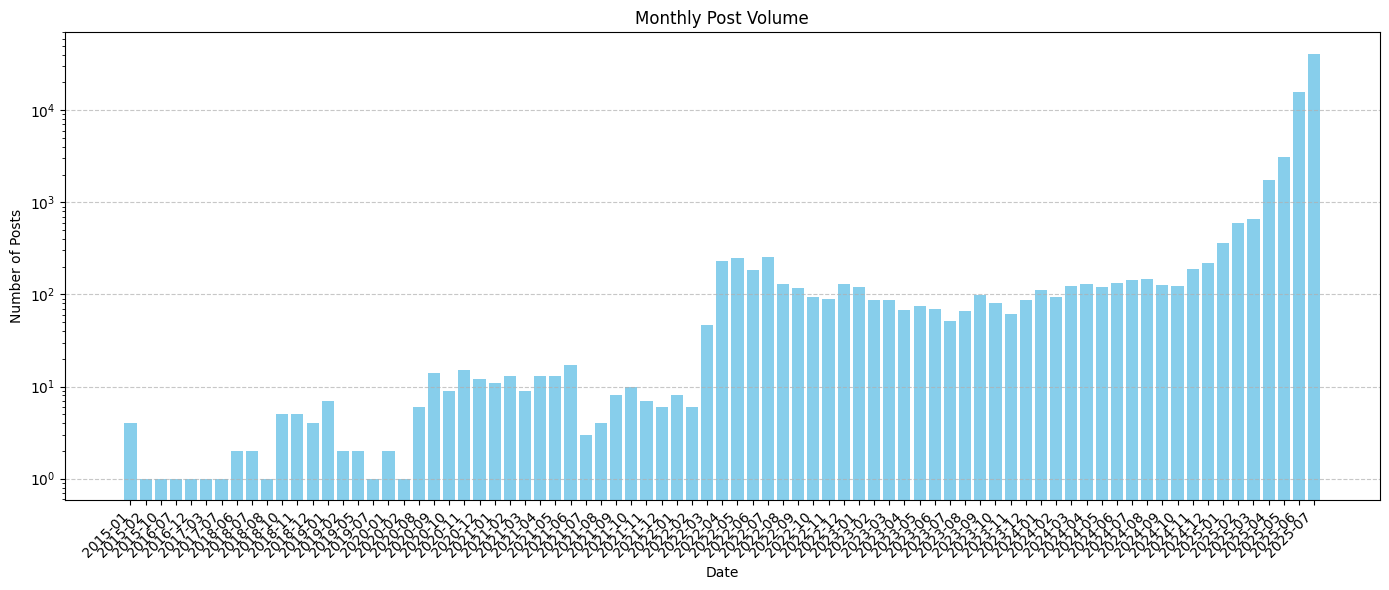

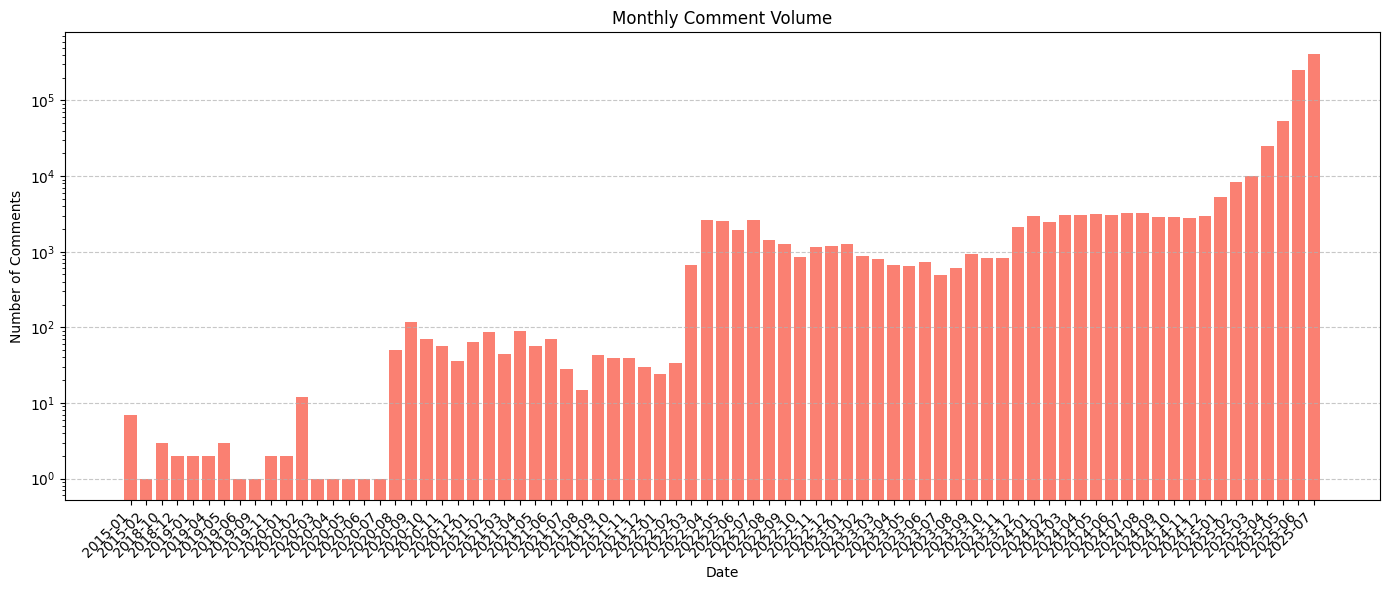

In [34]:
import matplotlib.pyplot as plt

plt.style.use('default')  # White background

# Plot Monthly Post Volume
plt.figure(figsize=(14,6))
plt.bar(posts_monthly.index.astype(str), posts_monthly.values, color='skyblue')
plt.title('Monthly Post Volume')
plt.xlabel('Date')
plt.ylabel('Number of Posts')
plt.yscale('log')  # Log scale so old months are visible
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot Monthly Comment Volume
plt.figure(figsize=(14,6))
plt.bar(comments_monthly.index.astype(str), comments_monthly.values, color='salmon')
plt.title('Monthly Comment Volume')
plt.xlabel('Date')
plt.ylabel('Number of Comments')
plt.yscale('log')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

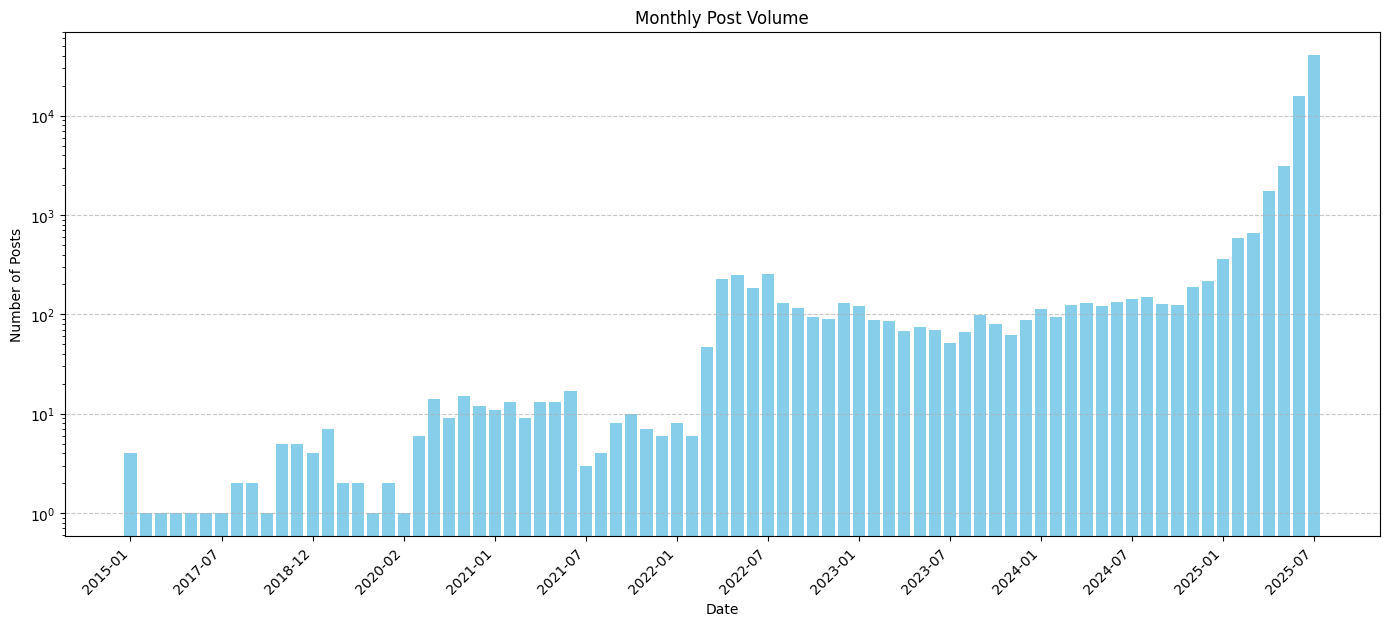

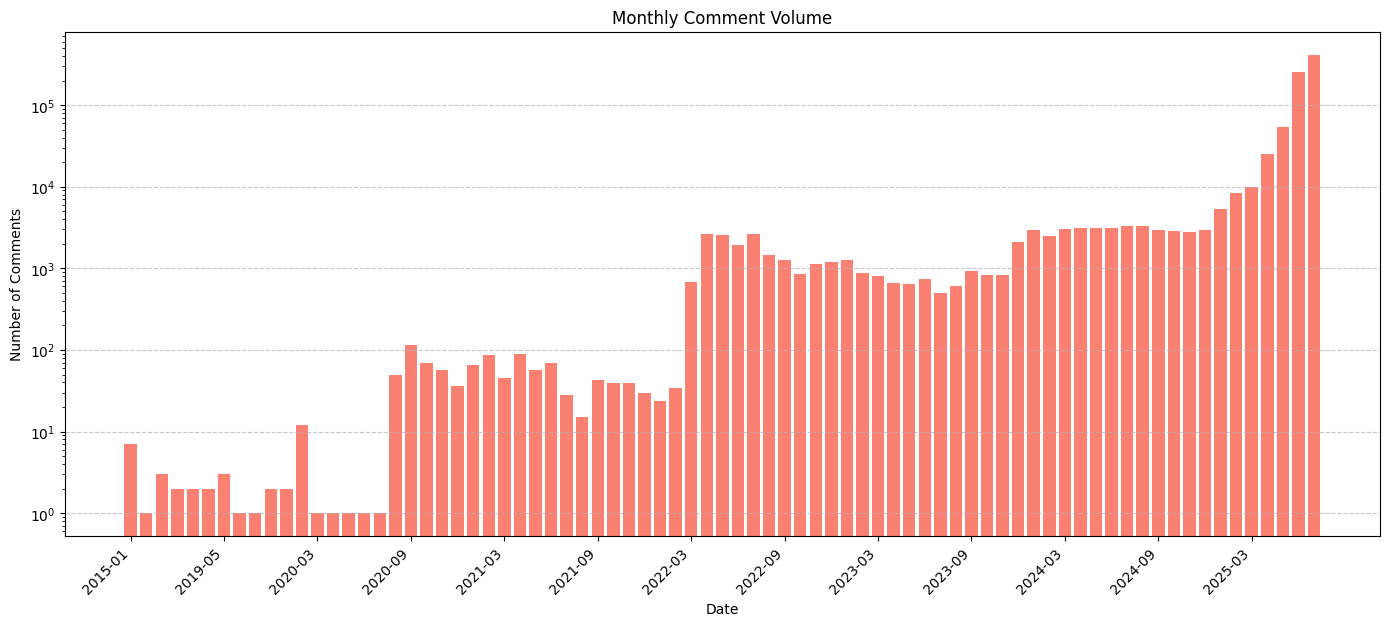

In [35]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('default')  # White background

# For Monthly Post Volume
fig, ax = plt.subplots(figsize=(14,6))
ax.bar(posts_monthly.index.astype(str), posts_monthly.values, color='skyblue')
ax.set_title('Monthly Post Volume')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Posts')
ax.set_yscale('log')
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show only every 6th label
N = 6
xticks_pos = np.arange(0, len(posts_monthly.index), N)
ax.set_xticks(xticks_pos)
ax.set_xticklabels([str(posts_monthly.index[i]) for i in xticks_pos], rotation=45, ha='right')

plt.show()

# For Monthly Comment Volume
fig, ax = plt.subplots(figsize=(14,6))
ax.bar(comments_monthly.index.astype(str), comments_monthly.values, color='salmon')
ax.set_title('Monthly Comment Volume')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Comments')
ax.set_yscale('log')
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

xticks_pos = np.arange(0, len(comments_monthly.index), N)
ax.set_xticks(xticks_pos)
ax.set_xticklabels([str(comments_monthly.index[i]) for i in xticks_pos], rotation=45, ha='right')

plt.show()

In [36]:
# Check the earliest dates in posts
print(reddit_posts['date'].sort_values().head(20))

# Check for posts with date before your expected start (e.g., 2022)
early_posts = reddit_posts[reddit_posts['date'] < '2022-01-01']
print(f"Number of posts before 2022: {len(early_posts)}")
print(early_posts[['date','content']].head())

11477   2015-01-20 20:31:03+00:00
11476   2015-01-21 13:10:53+00:00
11475   2015-01-22 05:00:16+00:00
11474   2015-01-28 16:06:36+00:00
11473   2015-02-05 18:07:37+00:00
11472   2015-10-23 05:09:39+00:00
11471   2016-07-07 18:44:54+00:00
11470   2016-12-14 05:15:17+00:00
11469   2017-03-02 03:35:24+00:00
11468   2017-07-24 20:14:07+00:00
11467   2018-06-04 00:37:36+00:00
11466   2018-06-14 01:33:56+00:00
11465   2018-07-03 20:38:12+00:00
11464   2018-07-16 02:32:22+00:00
11463   2018-08-29 02:59:31+00:00
11462   2018-10-18 03:00:47+00:00
11461   2018-10-20 15:51:50+00:00
11460   2018-10-21 19:31:06+00:00
11459   2018-10-25 22:34:41+00:00
11458   2018-10-31 01:26:35+00:00
Name: date, dtype: datetime64[ns, UTC]
Number of posts before 2022: 214
                           date  \
11434 2020-02-10 19:42:56+00:00   
11435 2020-01-29 17:55:41+00:00   
11436 2020-01-27 13:23:42+00:00   
11437 2019-07-29 01:17:08+00:00   
11438 2019-05-21 22:25:40+00:00   

                                     

In [37]:
print(reddit_comments['date'].sort_values().head(20))
early_comments = reddit_comments[reddit_comments['date'] < '2022-01-01']
print(f"Number of comments before 2022: {len(early_comments)}")
print(early_comments[['date','content']].head())

160124   2015-01-21 04:40:43+00:00
160125   2015-01-21 08:08:38+00:00
160126   2015-01-21 13:07:40+00:00
160127   2015-01-22 00:34:59+00:00
160122   2015-01-22 00:59:11+00:00
160123   2015-01-22 02:01:48+00:00
160121   2015-01-22 14:51:26+00:00
160120   2015-02-09 16:59:23+00:00
160118   2018-10-22 08:33:21+00:00
160119   2018-10-23 09:43:41+00:00
160116   2018-10-31 12:13:05+00:00
160112   2018-12-16 21:38:32+00:00
160113   2018-12-17 11:38:01+00:00
160108   2019-01-29 17:38:51+00:00
160109   2019-01-30 05:36:20+00:00
160114   2019-04-05 15:20:46+00:00
160115   2019-04-06 00:57:14+00:00
160105   2019-05-09 19:36:12+00:00
160097   2019-05-22 04:07:44+00:00
160098   2019-05-22 04:08:02+00:00
Name: date, dtype: datetime64[ns, UTC]
Number of comments before 2022: 976
                            date  \
160056 2020-02-10 20:07:10+00:00   
160057 2020-02-10 20:09:39+00:00   
160058 2020-02-10 20:18:01+00:00   
160059 2020-02-10 20:27:45+00:00   
160060 2020-02-10 20:28:01+00:00   

        

In [38]:
print("Post date range:", reddit_posts['date'].min(), "to", reddit_posts['date'].max())
print("Comment date range:", reddit_comments['date'].min(), "to", reddit_comments['date'].max())

Post date range: 2015-01-20 20:31:03+00:00 to 2025-07-17 15:03:47+00:00
Comment date range: 2015-01-21 04:40:43+00:00 to 2025-07-17 15:09:14+00:00


In [41]:
print("Earliest posts:")
print(reddit_posts.sort_values('date').head(5)[['date', 'content']])

print("Earliest comments:")
print(reddit_comments.sort_values('date').head(5)[['date', 'content']])

Earliest posts:
                           date  \
11477 2015-01-20 20:31:03+00:00   
11476 2015-01-21 13:10:53+00:00   
11475 2015-01-22 05:00:16+00:00   
11474 2015-01-28 16:06:36+00:00   
11473 2015-02-05 18:07:37+00:00   

                                                 content  
11477  welcome welcome parents and caregivers to auti...  
11476                                     embrace autism  
11475  offering a weighted stuffed animal or lappad t...  
11474  can anyone offer iep help my daughter is 10 ye...  
11473  facebook group for parents and caregivers deal...  
Earliest comments:
                            date  \
160124 2015-01-21 04:40:43+00:00   
160125 2015-01-21 08:08:38+00:00   
160126 2015-01-21 13:07:40+00:00   
160127 2015-01-22 00:34:59+00:00   
160122 2015-01-22 00:59:11+00:00   

                                                  content  
160124  hi i think this new forum is an excellent idea...  
160125                              thanks for doing this  
160

year
2015        6
2016        2
2017        2
2018       19
2019       12
2020       59
2021      114
2022     1539
2023      952
2024     1662
2025    63559
Name: count, dtype: int64


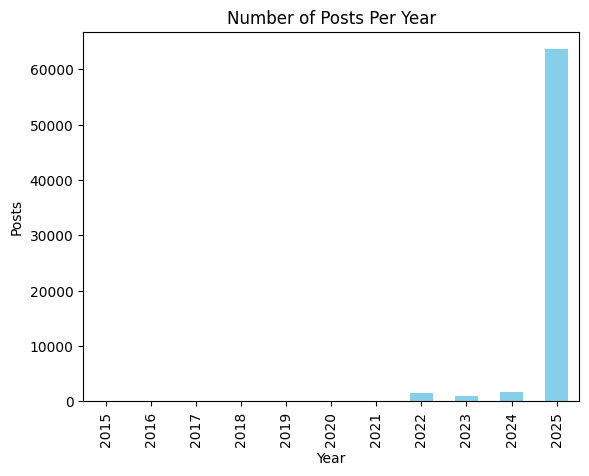

year
2015         8
2018         5
2019        11
2020       347
2021       605
2022     16329
2023     10803
2024     35922
2025    772782
Name: count, dtype: int64


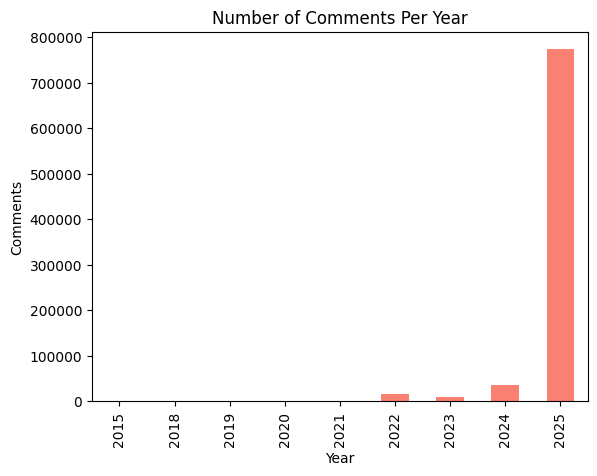

In [46]:
# Posts per year
reddit_posts['year'] = reddit_posts['date'].dt.year
post_counts_by_year = reddit_posts['year'].value_counts().sort_index()
print(post_counts_by_year)
post_counts_by_year.plot(kind='bar', color='skyblue')
plt.title('Number of Posts Per Year')
plt.ylabel('Posts')
plt.xlabel('Year')
plt.show()

# Comments per year
reddit_comments['year'] = reddit_comments['date'].dt.year
comment_counts_by_year = reddit_comments['year'].value_counts().sort_index()
print(comment_counts_by_year)
comment_counts_by_year.plot(kind='bar', color='salmon')
plt.title('Number of Comments Per Year')
plt.ylabel('Comments')
plt.xlabel('Year')
plt.show()

category
AskReddit             1828
MakeNewFriendsHere    1386
Advice                1379
suicidewatch          1213
mentalhealth          1145
                      ... 
relationships          780
mentalillness          770
LifeProTips            762
autismparents           44
sad                      1
Name: count, Length: 69, dtype: int64


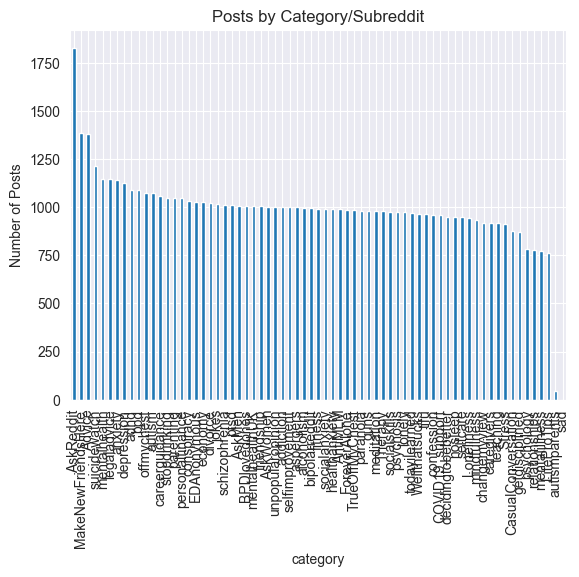

In [32]:
# 3. Category/Subreddit Distribution: Visualize top categories/subreddits
if 'category' in reddit_posts.columns:
    print(reddit_posts['category'].value_counts())
    reddit_posts['category'].value_counts().plot(kind='bar', title='Posts by Category/Subreddit')
    plt.ylabel('Number of Posts')
    plt.show()
elif 'subreddit' in reddit_posts.columns:
    print(reddit_posts['subreddit'].value_counts().head(10))
    reddit_posts['subreddit'].value_counts().head(10).plot(kind='bar', title='Top 10 Subreddits')
    plt.ylabel('Number of Posts')
    plt.show()

In [49]:
# Replace 'category' with 'subreddit' if that's your column name
posts_by_category = reddit_posts['category'].value_counts()

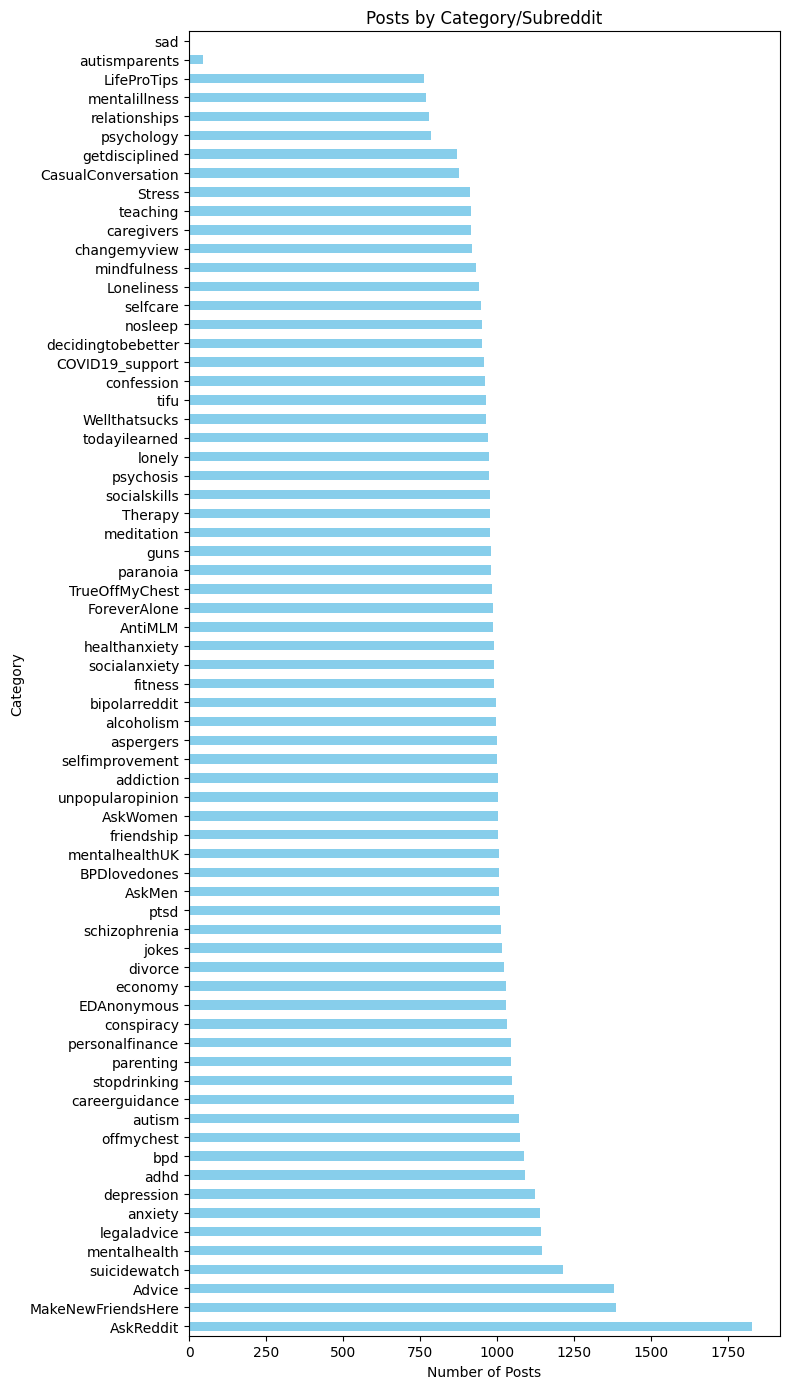

In [50]:
plt.figure(figsize=(8,14))
posts_by_category.sort_values(ascending=False).plot(kind='barh', color='skyblue')
plt.title('Posts by Category/Subreddit')
plt.xlabel('Number of Posts')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

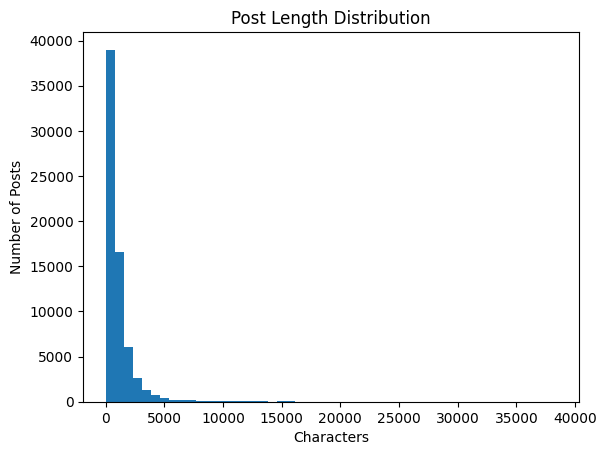

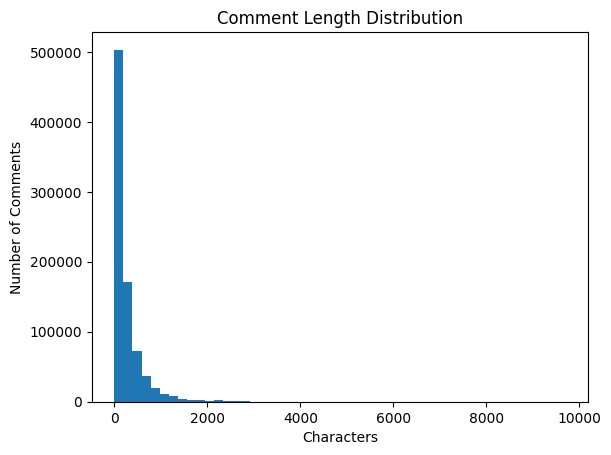

In [51]:
# 4. Length Distribution: Histogram of post/comment lengths
plt.hist(reddit_posts['content'].str.len(), bins=50)
plt.title('Post Length Distribution')
plt.xlabel('Characters')
plt.ylabel('Number of Posts')
plt.show()

plt.hist(reddit_comments['content'].str.len(), bins=50)
plt.title('Comment Length Distribution')
plt.xlabel('Characters')
plt.ylabel('Number of Comments')
plt.show()

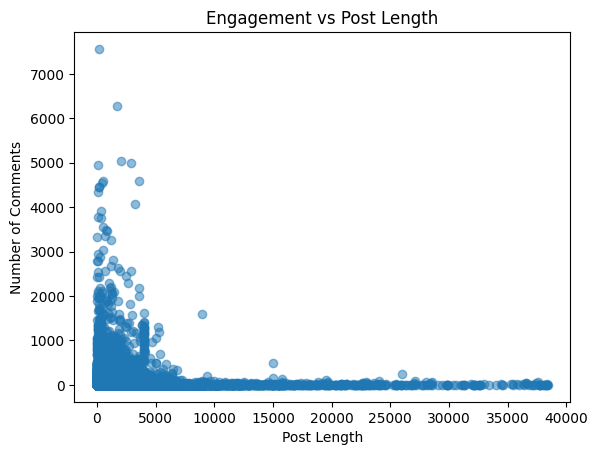

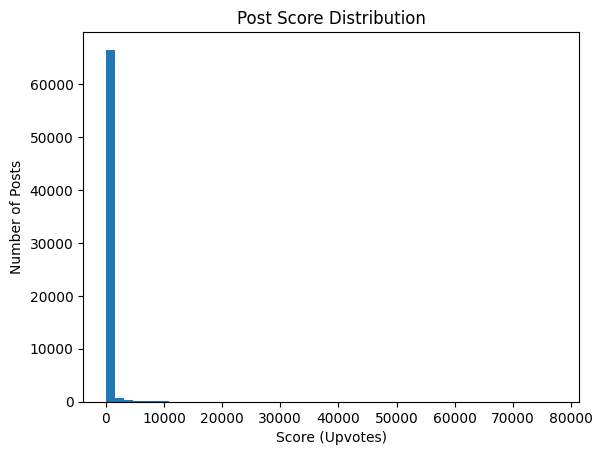

In [52]:
# 5. Engagement: Scatter plot of post length vs number of comments, and score distribution
if 'num_comments' in reddit_posts.columns:
    plt.scatter(reddit_posts['content'].str.len(), reddit_posts['num_comments'], alpha=0.5)
    plt.xlabel('Post Length')
    plt.ylabel('Number of Comments')
    plt.title('Engagement vs Post Length')
    plt.show()

if 'score' in reddit_posts.columns:
    plt.hist(reddit_posts['score'], bins=50)
    plt.title('Post Score Distribution')
    plt.xlabel('Score (Upvotes)')
    plt.ylabel('Number of Posts')
    plt.show()

In [53]:
# 6. Mental Health Keyword Extraction: Count and display key terms
keywords = ['depressed', 'anxiety', 'suicidal', 'help', 'panic', 'support']
for kw in keywords:
    count = reddit_posts['content'].str.contains(kw, case=False).sum()
    print(f"Posts containing '{kw}': {count}")

# Most common words in posts
from collections import Counter
all_words = ' '.join(reddit_posts['content']).split()
word_freq = Counter(all_words)
print("Most common words:", word_freq.most_common(20))

Posts containing 'depressed': 1617
Posts containing 'anxiety': 5892
Posts containing 'suicidal': 1001
Posts containing 'help': 15863
Posts containing 'panic': 2165
Posts containing 'support': 4279
Most common words: [('i', 631856), ('to', 440367), ('the', 429701), ('and', 420671), ('a', 312517), ('my', 236578), ('of', 211761), ('it', 186605), ('in', 171832), ('that', 161823), ('me', 148608), ('for', 135467), ('was', 133654), ('but', 126632), ('is', 118283), ('with', 110935), ('this', 103885), ('im', 100789), ('have', 94815), ('you', 90510)]


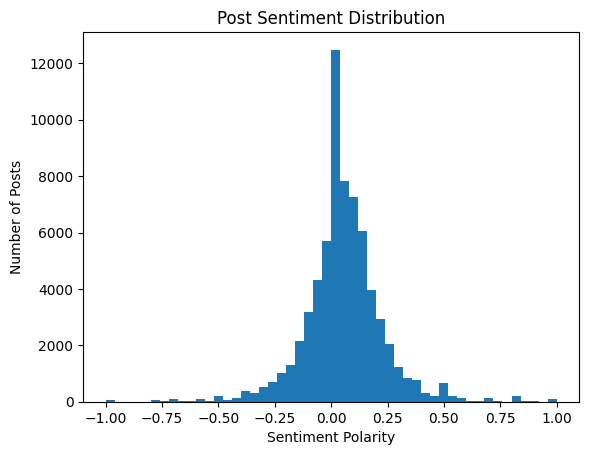

In [55]:
# 7. Sentiment Analysis: Calculate sentiment and plot distribution
from textblob import TextBlob

reddit_posts['sentiment'] = reddit_posts['content'].apply(lambda x: TextBlob(x).sentiment.polarity)
plt.hist(reddit_posts['sentiment'], bins=50)
plt.title('Post Sentiment Distribution')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Number of Posts')
plt.show()

In [56]:
# 8. Qualitative Samples: Display posts for 'help' and most negative sentiment
print("Sample posts mentioning 'help':")
print(reddit_posts[reddit_posts['content'].str.contains('help', case=False)].sample(3)['content'].values)

print("Sample most negative posts:")
print(reddit_posts.nsmallest(3, 'sentiment')['content'].values)

Sample posts mentioning 'help':
['my fianc 29m have some addictive habits that are causing me 30f ptsd triggers i really need to find out if im waisting my time or not and whats difficult about this relationship is that my fianc we will call him dan has some serious addictive behaviors that i think are somewhat of a trauma response to some issues hes had in childhood im sorry if this is long but i need to get this out because i have no idea if im going down another path of heartbreak and self destruction ive already had a rough couple years and am currently pregnant with dans baby i met dan a little over a couple years ago he was an alcoholic in recovery and i was a single mom who moved in next door for a while i avoided him because i knew that was not a good idea to pursue friendship at the time as time when on i saw he cleaned up got a job and kept busy and didnt seem codependent any longer i decided to take my guard down a little bit and get to know him more than just acquaintances 

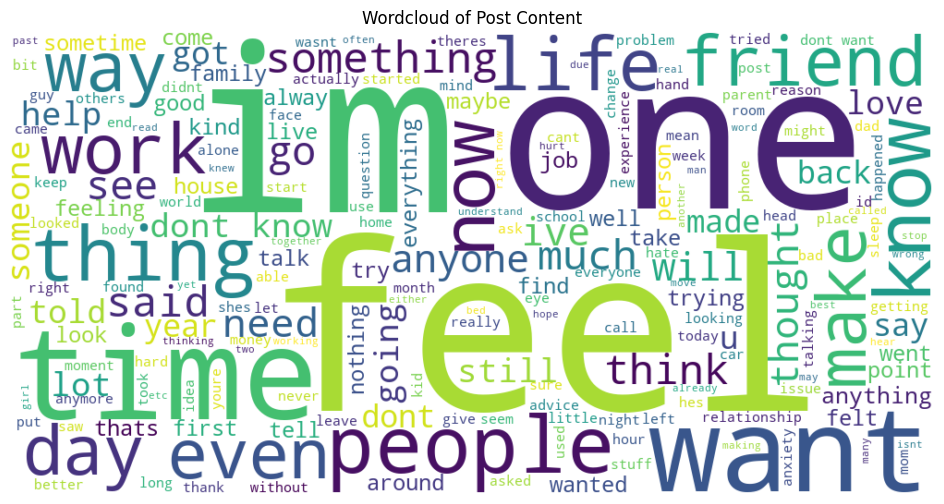

In [57]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = ' '.join(reddit_posts['content'].dropna())
wc = WordCloud(width=1000, height=500, background_color='white').generate(text)
plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud of Post Content')
plt.show()

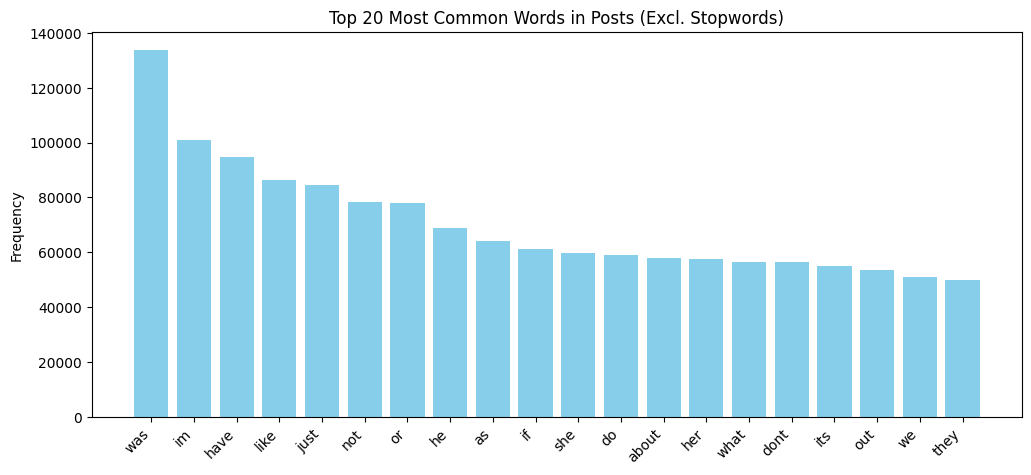

In [59]:
from collections import Counter
import re

stopwords = set([
    'the', 'and', 'to', 'a', 'i', 'of', 'in', 'it', 'is', 'for', 'on',
    'with', 'you', 'this', 'my', 'but', 'that', 'at', 'me', 'so', 'be'
])
all_words = ' '.join(reddit_posts['content'].dropna()).lower()
all_words = re.findall(r'\b\w+\b', all_words)
filtered_words = [w for w in all_words if w not in stopwords]
word_freq = Counter(filtered_words)
top_words = word_freq.most_common(20)

words, counts = zip(*top_words)
plt.figure(figsize=(12,5))
plt.bar(words, counts, color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title('Top 20 Most Common Words in Posts (Excl. Stopwords)')
plt.ylabel('Frequency')
plt.show()

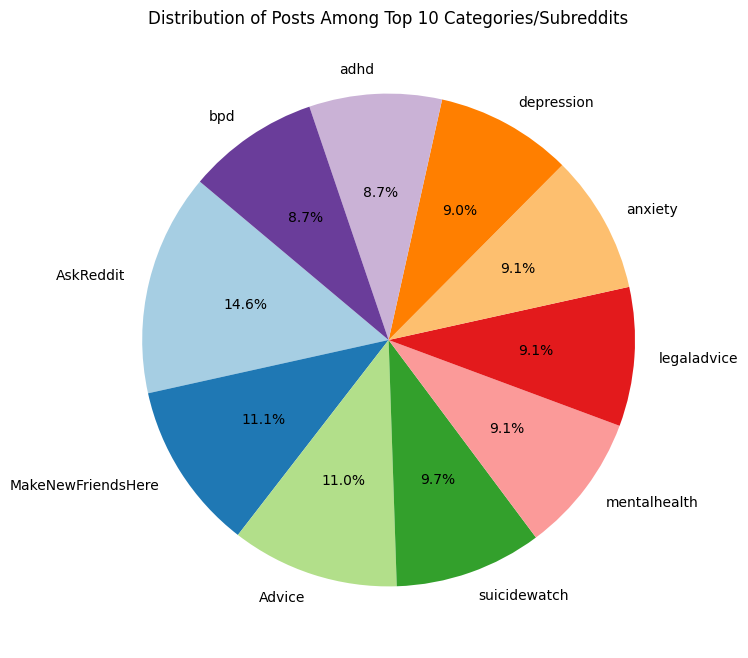

In [60]:
top_n = 10
top_categories = reddit_posts['category'].value_counts().head(top_n)
plt.figure(figsize=(8,8))
plt.pie(top_categories, labels=top_categories.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of Posts Among Top 10 Categories/Subreddits')
plt.show()

C:\Users\aipro\AppData\Local\Temp\ipykernel_25308\3043225211.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  help_monthly = reddit_posts[mask].groupby(reddit_posts['date'].dt.to_period('M')).size()


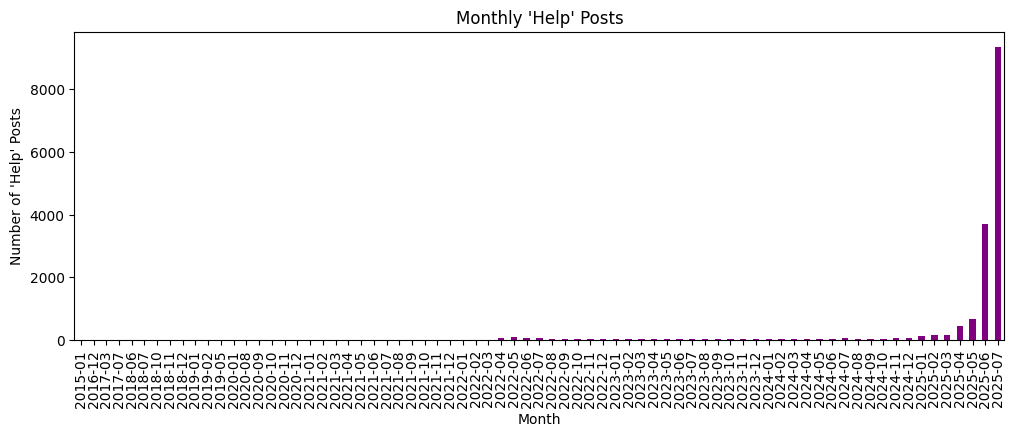

In [62]:
mask = reddit_posts['content'].str.contains('help', case=False, na=False)
help_monthly = reddit_posts[mask].groupby(reddit_posts['date'].dt.to_period('M')).size()
help_monthly.plot(kind='bar', color='purple', figsize=(12,4))
plt.title("Monthly 'Help' Posts")
plt.xlabel('Month')
plt.ylabel("Number of 'Help' Posts")
plt.show()

C:\Users\aipro\AppData\Local\Temp\ipykernel_25308\727806757.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  sentiment_monthly = reddit_posts.groupby(reddit_posts['date'].dt.to_period('M'))['sentiment'].mean()


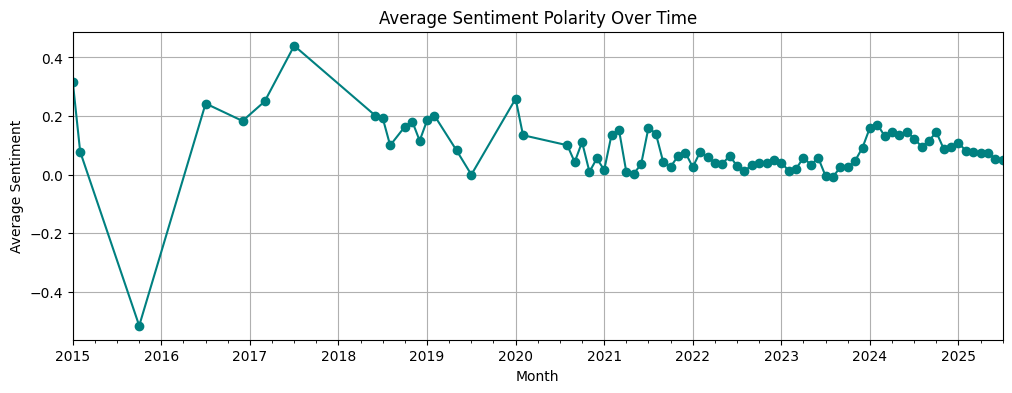

In [63]:
if 'sentiment' in reddit_posts.columns:
    sentiment_monthly = reddit_posts.groupby(reddit_posts['date'].dt.to_period('M'))['sentiment'].mean()
    sentiment_monthly.plot(kind='line', marker='o', color='teal', figsize=(12,4))
    plt.title('Average Sentiment Polarity Over Time')
    plt.xlabel('Month')
    plt.ylabel('Average Sentiment')
    plt.grid(True)
    plt.show()

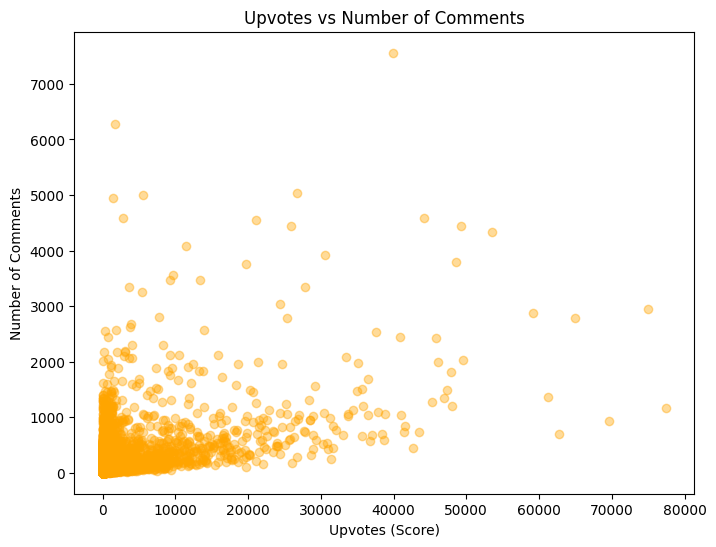

In [64]:
if 'score' in reddit_posts.columns and 'num_comments' in reddit_posts.columns:
    plt.figure(figsize=(8,6))
    plt.scatter(reddit_posts['score'], reddit_posts['num_comments'], alpha=0.4, color='orange')
    plt.xlabel('Upvotes (Score)')
    plt.ylabel('Number of Comments')
    plt.title('Upvotes vs Number of Comments')
    plt.show()

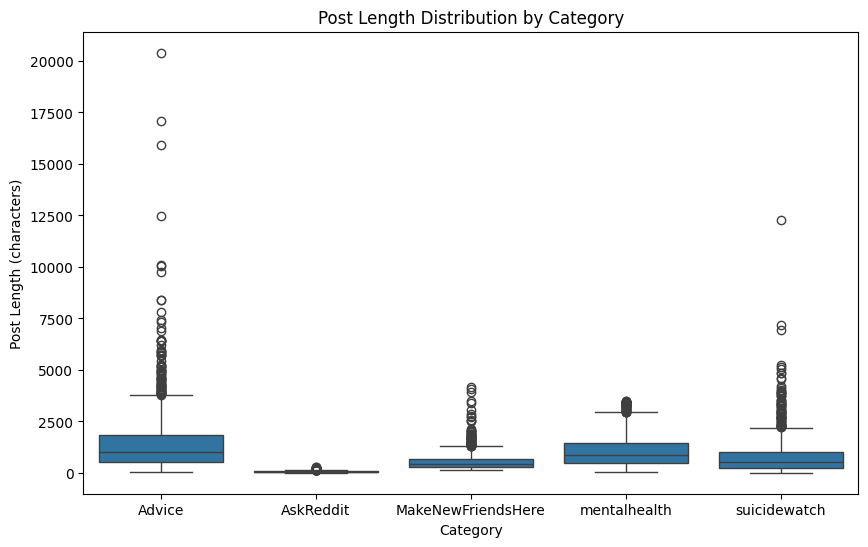

In [65]:
import seaborn as sns

reddit_posts['post_length'] = reddit_posts['content'].str.len()
top_categories = reddit_posts['category'].value_counts().head(5).index  # Top 5 for clarity
subset = reddit_posts[reddit_posts['category'].isin(top_categories)]
plt.figure(figsize=(10,6))
sns.boxplot(x='category', y='post_length', data=subset)
plt.title('Post Length Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Post Length (characters)')
plt.show()

C:\Users\aipro\AppData\Local\Temp\ipykernel_25308\3311420407.py:3: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  subset['month'] = subset['date'].dt.to_period('M').astype(str)
C:\Users\aipro\AppData\Local\Temp\ipykernel_25308\3311420407.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['month'] = subset['date'].dt.to_period('M').astype(str)


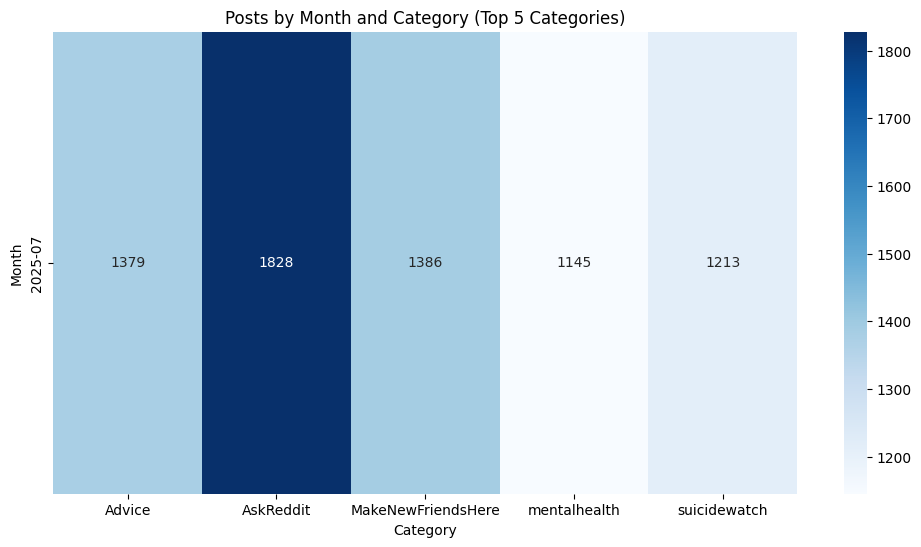

In [66]:
top_categories = reddit_posts['category'].value_counts().head(5).index
subset = reddit_posts[reddit_posts['category'].isin(top_categories)]
subset['month'] = subset['date'].dt.to_period('M').astype(str)
pivot = subset.pivot_table(index='month', columns='category', values='content', aggfunc='count', fill_value=0)

plt.figure(figsize=(12,6))
sns.heatmap(pivot, annot=True, fmt='d', cmap='Blues')
plt.title('Posts by Month and Category (Top 5 Categories)')
plt.ylabel('Month')
plt.xlabel('Category')
plt.show()

In [67]:
if 'num_comments' in reddit_posts.columns:
    avg_comments = reddit_posts['num_comments'].mean()
    print(f"Average number of comments per post: {avg_comments:.2f}")

Average number of comments per post: 32.08


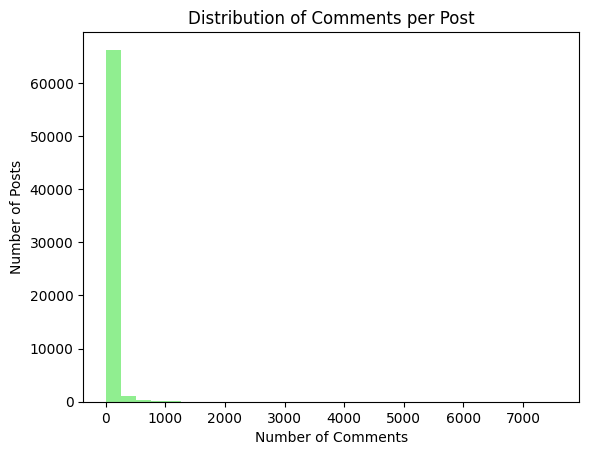

In [68]:
plt.hist(reddit_posts['num_comments'], bins=30, color='lightgreen')
plt.title('Distribution of Comments per Post')
plt.xlabel('Number of Comments')
plt.ylabel('Number of Posts')
plt.show()

C:\Users\aipro\AppData\Local\Temp\ipykernel_25308\4149604523.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  reddit_comments['month'] = reddit_comments['date'].dt.to_period('M')


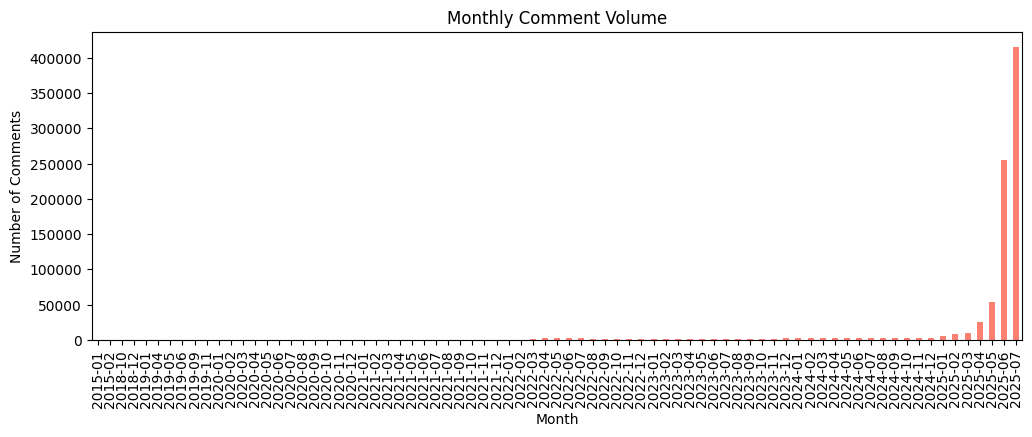

In [69]:
reddit_comments['month'] = reddit_comments['date'].dt.to_period('M')
monthly_comments = reddit_comments.groupby('month').size()
monthly_comments.plot(kind='bar', figsize=(12,4), color='salmon')
plt.title('Monthly Comment Volume')
plt.xlabel('Month')
plt.ylabel('Number of Comments')
plt.show()

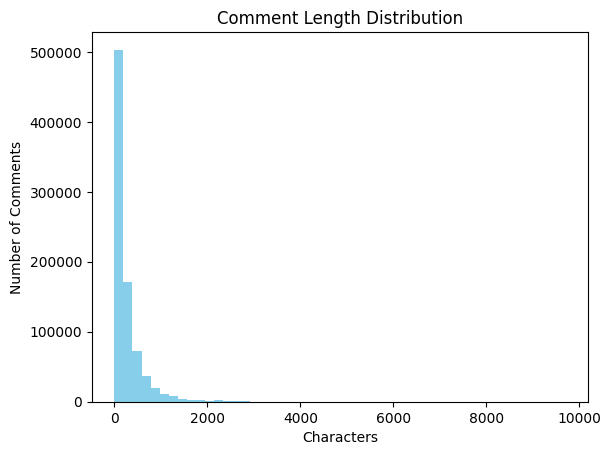

In [70]:
plt.hist(reddit_comments['content'].str.len(), bins=50, color='skyblue')
plt.title('Comment Length Distribution')
plt.xlabel('Characters')
plt.ylabel('Number of Comments')
plt.show()

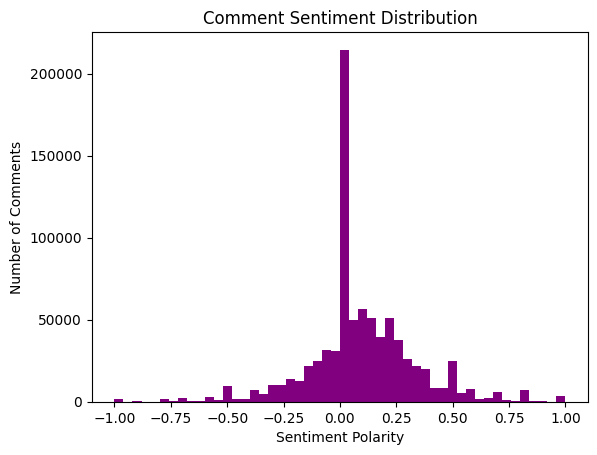

In [72]:
from textblob import TextBlob

reddit_comments['sentiment'] = reddit_comments['content'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
plt.hist(reddit_comments['sentiment'], bins=50, color='purple')
plt.title('Comment Sentiment Distribution')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Number of Comments')
plt.show()

In [73]:
top_posts = reddit_posts.sort_values('num_comments', ascending=False).head(5)
for idx, row in top_posts.iterrows():
    print(f"Post: {row['content']}\nComments: {row['num_comments']}\n---")

Post: wife said my feet barely look human havent been able to find shoes in years was complaining about it last night and she hit me with well your feet barely look human ouch
Comments: 7562
---
Post: cmv men should be allowed to decide not to raise children they didnt want personally i am very supportive of women having abortions if they want to and do not believe that men should have a role in deciding whether a woman has an abortion however i believe that if a woman decides to keep their pregnancy and the man does not the man should be able to inform the woman of his decision to not contribute towards raising the child or define a limitation to how much they would like to contribute it is then up to the woman to decide how they would like to proceed on the contrary if a man does commit to a certain level of contribution he should be held accountable to fulfilling it contingent to his situation not having drastic unpredictable changes essentially i believe there is an imbalance in th

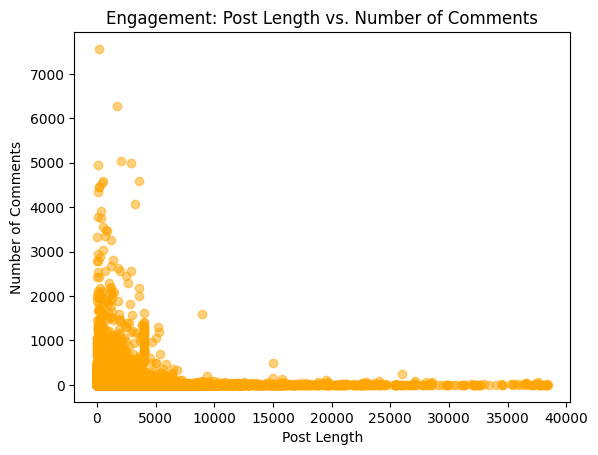

In [74]:
plt.scatter(reddit_posts['content'].str.len(), reddit_posts['num_comments'], alpha=0.5, color='orange')
plt.xlabel('Post Length')
plt.ylabel('Number of Comments')
plt.title('Engagement: Post Length vs. Number of Comments')
plt.show()

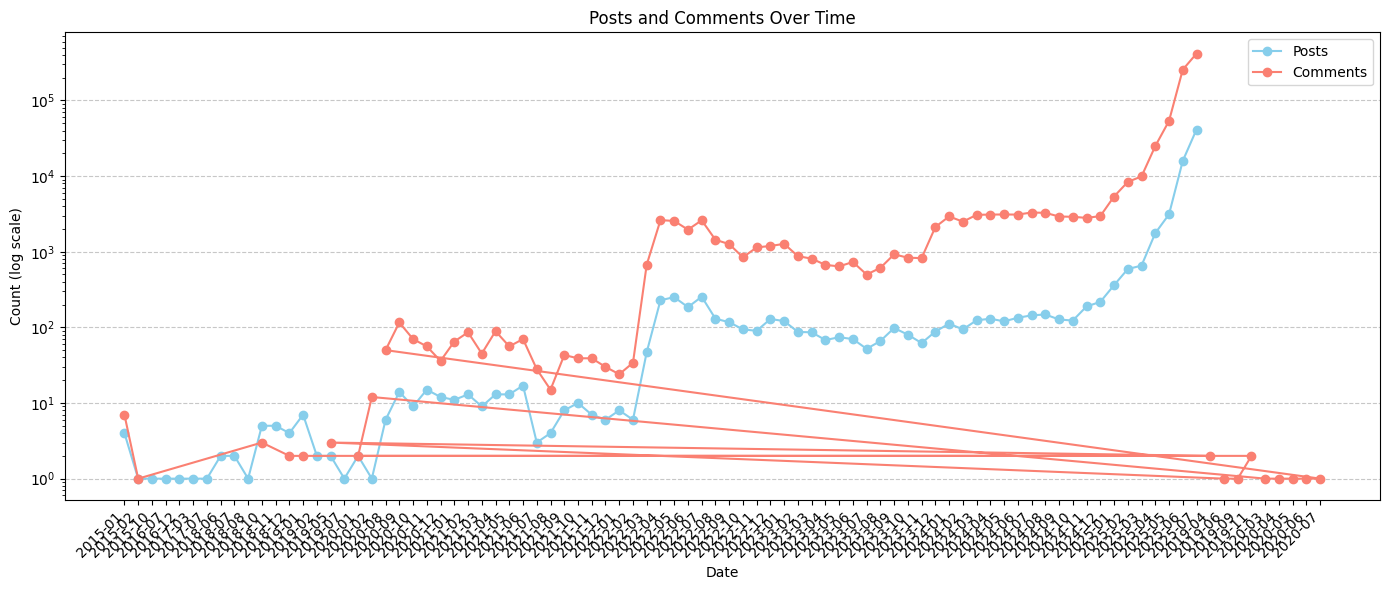

In [75]:
import matplotlib.pyplot as plt

# Assuming you already have posts_monthly and comments_monthly as in your previous code
plt.figure(figsize=(14,6))
plt.plot(posts_monthly.index.astype(str), posts_monthly.values, label='Posts', marker='o', color='skyblue')
plt.plot(comments_monthly.index.astype(str), comments_monthly.values, label='Comments', marker='o', color='salmon')
plt.title('Posts and Comments Over Time')
plt.xlabel('Date')
plt.ylabel('Count (log scale)')
plt.yscale('log')  # Use log scale if counts vary greatly
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

C:\Users\aipro\AppData\Local\Temp\ipykernel_25308\2057567500.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  reddit_posts['month'] = reddit_posts['date'].dt.to_period('M')


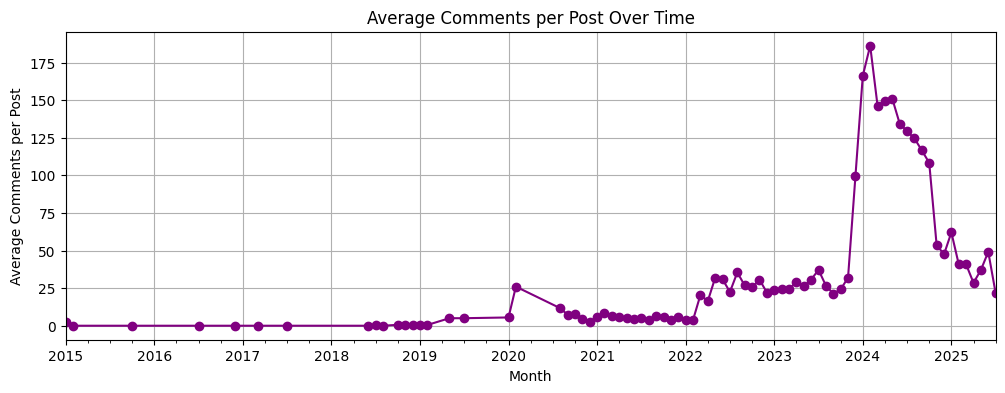

In [76]:
reddit_posts['month'] = reddit_posts['date'].dt.to_period('M')
avg_comments_monthly = reddit_posts.groupby('month')['num_comments'].mean()
avg_comments_monthly.plot(kind='line', marker='o', figsize=(12,4), color='purple')
plt.title('Average Comments per Post Over Time')
plt.xlabel('Month')
plt.ylabel('Average Comments per Post')
plt.grid(True)
plt.show()

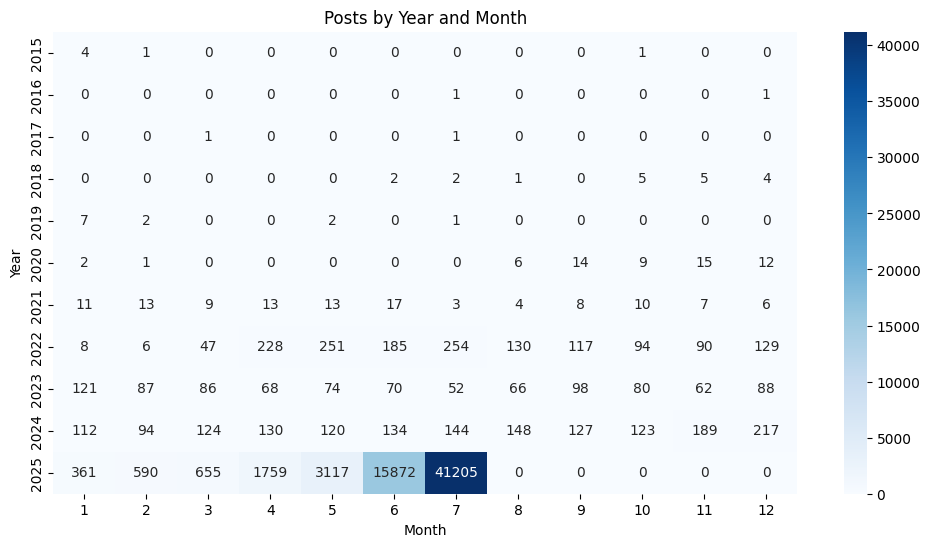

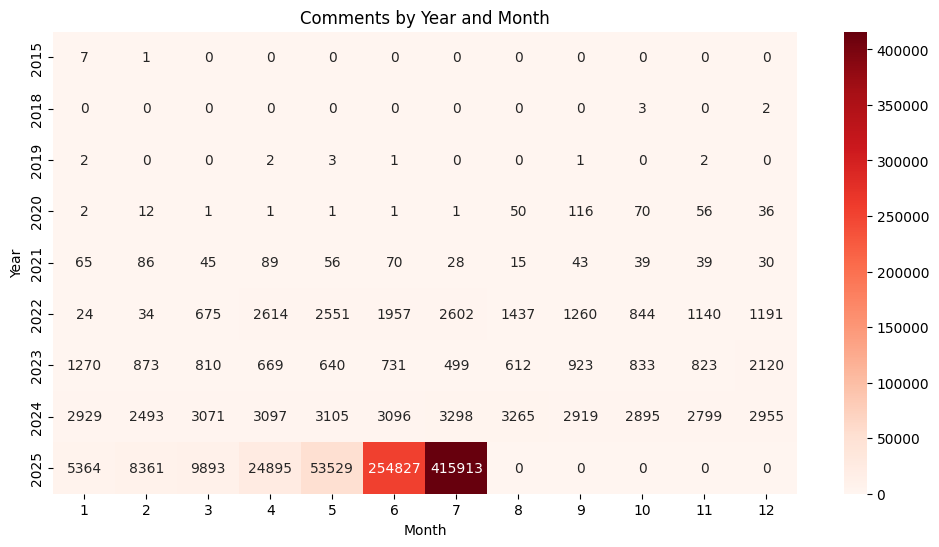

In [77]:
import seaborn as sns

# Posts heatmap
posts_heatmap = reddit_posts.groupby([reddit_posts['date'].dt.year, reddit_posts['date'].dt.month]).size().unstack(fill_value=0)
plt.figure(figsize=(12,6))
sns.heatmap(posts_heatmap, cmap='Blues', annot=True, fmt='d')
plt.title('Posts by Year and Month')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

# Comments heatmap
comments_heatmap = reddit_comments.groupby([reddit_comments['date'].dt.year, reddit_comments['date'].dt.month]).size().unstack(fill_value=0)
plt.figure(figsize=(12,6))
sns.heatmap(comments_heatmap, cmap='Reds', annot=True, fmt='d')
plt.title('Comments by Year and Month')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

In [78]:
posts_and_comments = pd.DataFrame({
    'posts': posts_monthly.values,
    'comments': comments_monthly.values
}, index=posts_monthly.index.astype(str))
corr = posts_and_comments.corr().iloc[0,1]
print(f"Correlation between post and comment volume per month: {corr:.2f}")

plt.figure(figsize=(8,6))
plt.scatter(posts_and_comments['posts'], posts_and_comments['comments'], alpha=0.7)
plt.xlabel('Number of Posts per Month')
plt.ylabel('Number of Comments per Month')
plt.title(f'Posts vs Comments per Month (Correlation: {corr:.2f})')
plt.show()

ValueError: Length of values (77) does not match length of index (79)

Reddit: Raw vs After-cleaning Counts
       Type  Raw Count  Cleaned Count
0     Posts      68047          67926
1  Comments     889153         836812


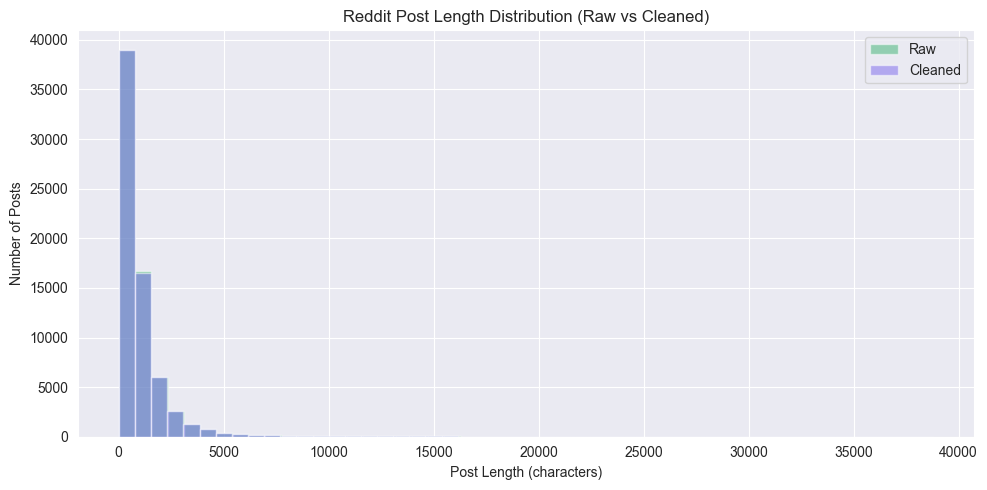

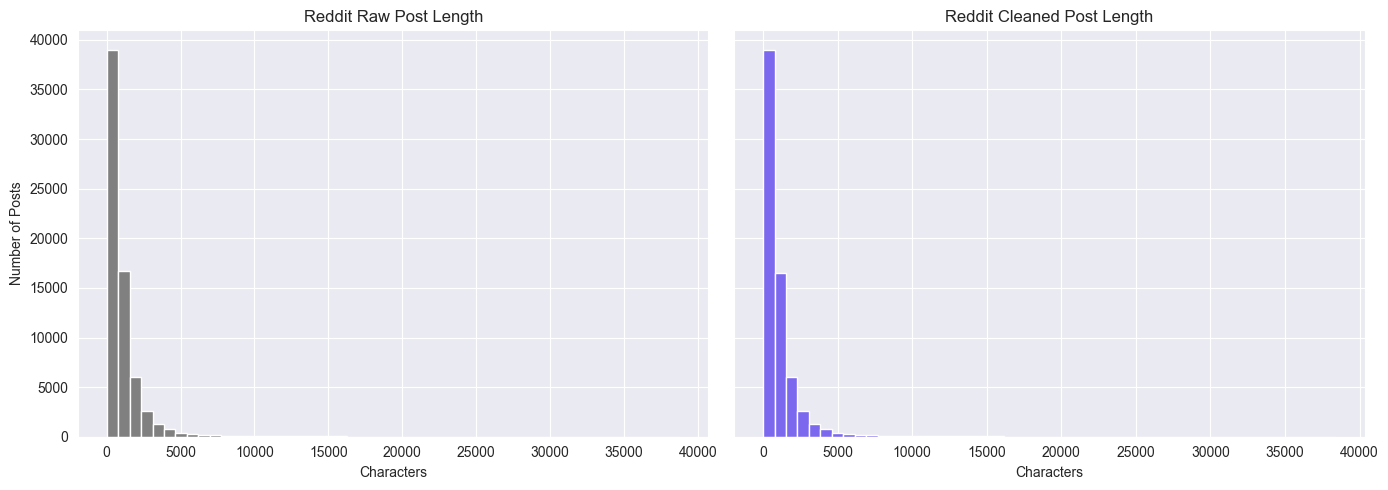

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ----- LOAD RAW DATA -----
from cleaning import load_and_clean_all_reddit_posts, load_and_clean_all_reddit_comments
reddit_posts_raw = load_and_clean_all_reddit_posts("../Data/Reddit")
reddit_comments_raw = load_and_clean_all_reddit_comments("../Data/Reddit")

# ----- LOAD CLEANED DATA -----
reddit_posts_clean = pd.read_csv("reddit_posts_clean_final.csv")
reddit_comments_clean = pd.read_csv("reddit_comments_clean_final.csv")

# ----- COUNTS TABLE -----
counts_df = pd.DataFrame({
    'Type': ['Posts', 'Comments'],
    'Raw Count': [len(reddit_posts_raw), len(reddit_comments_raw)],
    'Cleaned Count': [len(reddit_posts_clean), len(reddit_comments_clean)]
})
print("Reddit: Raw vs After-cleaning Counts")
print(counts_df)
counts_df.to_csv("reddit_raw_vs_cleaned_counts.csv", index=False)

# ----- HISTOGRAMS: POST LENGTH DISTRIBUTION -----
# Use 'content' column
reddit_posts_raw['post_length'] = reddit_posts_raw['content'].astype(str).str.len()
reddit_posts_clean['post_length'] = reddit_posts_clean['content'].astype(str).str.len()

# Overlay plot
plt.figure(figsize=(10,5))
plt.hist(reddit_posts_raw['post_length'], bins=50, alpha=0.5, label='Raw', color='mediumseagreen')
plt.hist(reddit_posts_clean['post_length'], bins=50, alpha=0.5, label='Cleaned', color='mediumslateblue')
plt.title('Reddit Post Length Distribution (Raw vs Cleaned)')
plt.xlabel('Post Length (characters)')
plt.ylabel('Number of Posts')
plt.legend()
plt.tight_layout()
plt.show()

# Side-by-side plot
fig, axes = plt.subplots(1,2, figsize=(14,5), sharey=True)
axes[0].hist(reddit_posts_raw['post_length'], bins=50, color='gray')
axes[0].set_title('Reddit Raw Post Length')
axes[0].set_xlabel('Characters')
axes[0].set_ylabel('Number of Posts')
axes[1].hist(reddit_posts_clean['post_length'], bins=50, color='mediumslateblue')
axes[1].set_title('Reddit Cleaned Post Length')
axes[1].set_xlabel('Characters')
plt.tight_layout()
plt.show()

C:\Users\aipro\AppData\Local\Temp\ipykernel_6256\3768732396.py:13: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  posts_monthly = reddit_posts.groupby(reddit_posts['date'].dt.to_period('M')).size().sort_index()
C:\Users\aipro\AppData\Local\Temp\ipykernel_6256\3768732396.py:14: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  comments_monthly = reddit_comments.groupby(reddit_comments['date'].dt.to_period('M')).size().sort_index()


ValueError: x and y must have same first dimension, but have shapes (79,) and (77,)

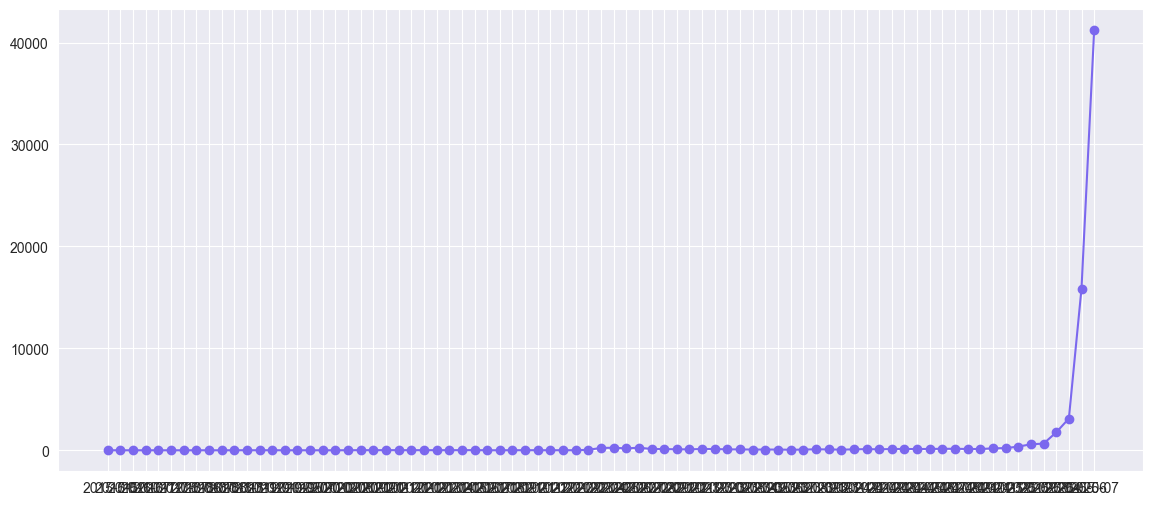

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Load cleaned Reddit posts/comments
reddit_posts = pd.read_csv("reddit_posts_clean_final.csv")
reddit_comments = pd.read_csv("reddit_comments_clean_final.csv")

# Convert to datetime (adjust column name if yours is different)
reddit_posts['date'] = pd.to_datetime(reddit_posts['date'], errors='coerce')
reddit_comments['date'] = pd.to_datetime(reddit_comments['date'], errors='coerce')

# Group by month and sort
posts_monthly = reddit_posts.groupby(reddit_posts['date'].dt.to_period('M')).size().sort_index()
comments_monthly = reddit_comments.groupby(reddit_comments['date'].dt.to_period('M')).size().sort_index()

# Prepare x-axis ticks (every 6th month)
N = 6
months = posts_monthly.index.astype(str)
xticks_pos = range(0, len(months), N)

plt.figure(figsize=(14,6))
plt.plot(months, posts_monthly.values, label='Posts', marker='o', color='mediumslateblue')
plt.plot(months, comments_monthly.values, label='Comments', marker='o', color='purple')
plt.title('Reddit: Monthly Posts and Comments')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(ticks=xticks_pos, labels=[months[i] for i in xticks_pos], rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

C:\Users\aipro\AppData\Local\Temp\ipykernel_6256\3754583131.py:13: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  posts_monthly = reddit_posts.groupby(reddit_posts['date'].dt.to_period('M')).size()
C:\Users\aipro\AppData\Local\Temp\ipykernel_6256\3754583131.py:14: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  comments_monthly = reddit_comments.groupby(reddit_comments['date'].dt.to_period('M')).size()


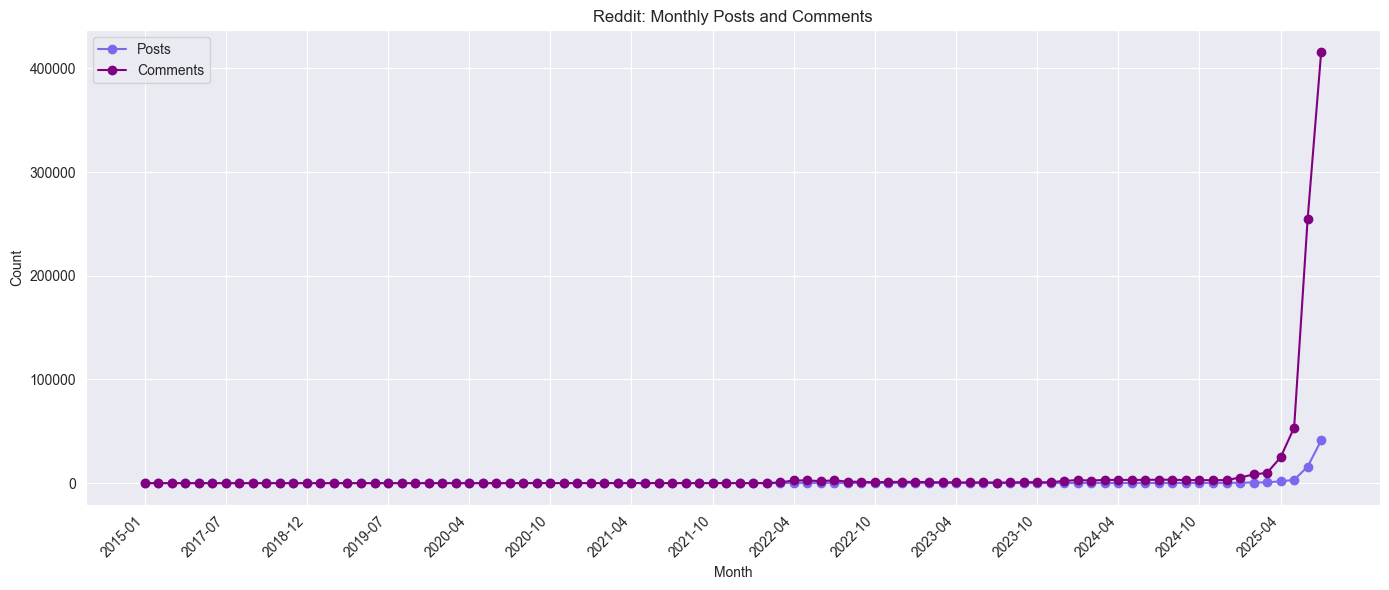

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Load cleaned Reddit posts/comments
reddit_posts = pd.read_csv("reddit_posts_clean_final.csv")
reddit_comments = pd.read_csv("reddit_comments_clean_final.csv")

# Convert to datetime
reddit_posts['date'] = pd.to_datetime(reddit_posts['date'], errors='coerce')
reddit_comments['date'] = pd.to_datetime(reddit_comments['date'], errors='coerce')

# Group by month
posts_monthly = reddit_posts.groupby(reddit_posts['date'].dt.to_period('M')).size()
comments_monthly = reddit_comments.groupby(reddit_comments['date'].dt.to_period('M')).size()

# Get the union of all months
all_months = posts_monthly.index.union(comments_monthly.index).sort_values()

# Reindex both series so they align
posts_monthly = posts_monthly.reindex(all_months, fill_value=0)
comments_monthly = comments_monthly.reindex(all_months, fill_value=0)

# Prepare x-axis ticks (every 6th month)
N = 6
months = all_months.astype(str)
xticks_pos = range(0, len(months), N)

plt.figure(figsize=(14,6))
plt.plot(months, posts_monthly.values, label='Posts', marker='o', color='mediumslateblue')
plt.plot(months, comments_monthly.values, label='Comments', marker='o', color='purple')
plt.title('Reddit: Monthly Posts and Comments')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(ticks=xticks_pos, labels=[months[i] for i in xticks_pos], rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

C:\Users\aipro\AppData\Local\Temp\ipykernel_6256\2205869264.py:13: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  posts_monthly = reddit_posts.groupby(reddit_posts['date'].dt.to_period('M')).size().sort_index()
C:\Users\aipro\AppData\Local\Temp\ipykernel_6256\2205869264.py:14: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  comments_monthly = reddit_comments.groupby(reddit_comments['date'].dt.to_period('M')).size().sort_index()


ValueError: x and y must have same first dimension, but have shapes (79,) and (77,)

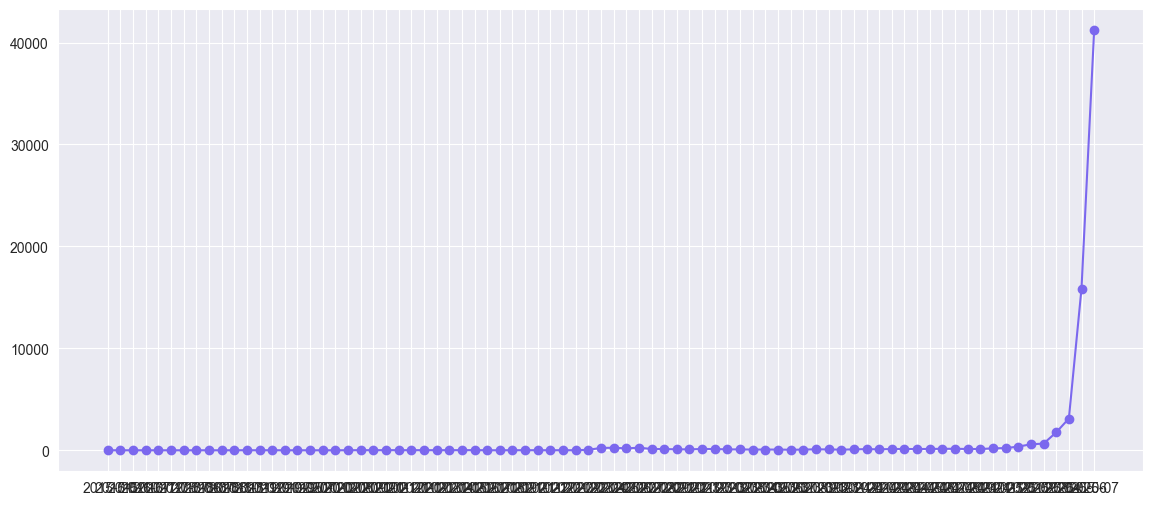

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Load cleaned Reddit posts/comments
reddit_posts = pd.read_csv("reddit_posts_clean_final.csv")
reddit_comments = pd.read_csv("reddit_comments_clean_final.csv")

# Convert to datetime
reddit_posts['date'] = pd.to_datetime(reddit_posts['date'], errors='coerce')
reddit_comments['date'] = pd.to_datetime(reddit_comments['date'], errors='coerce')

# Group by month and sort
posts_monthly = reddit_posts.groupby(reddit_posts['date'].dt.to_period('M')).size().sort_index()
comments_monthly = reddit_comments.groupby(reddit_comments['date'].dt.to_period('M')).size().sort_index()

# Prepare x-axis ticks (every 6th month)
N = 6
months = posts_monthly.index.astype(str)
xticks_pos = range(0, len(months), N)

plt.figure(figsize=(14,6))
plt.plot(months, posts_monthly.values, label='Posts', marker='o', color='mediumslateblue')
plt.plot(months, comments_monthly.values, label='Comments', marker='o', color='orchid')
plt.title('Reddit: Monthly Posts and Comments')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(ticks=xticks_pos, labels=[months[i] for i in xticks_pos], rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

C:\Users\aipro\AppData\Local\Temp\ipykernel_6256\546754095.py:13: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  posts_monthly = reddit_posts.groupby(reddit_posts['date'].dt.to_period('M')).size()
C:\Users\aipro\AppData\Local\Temp\ipykernel_6256\546754095.py:14: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  comments_monthly = reddit_comments.groupby(reddit_comments['date'].dt.to_period('M')).size()


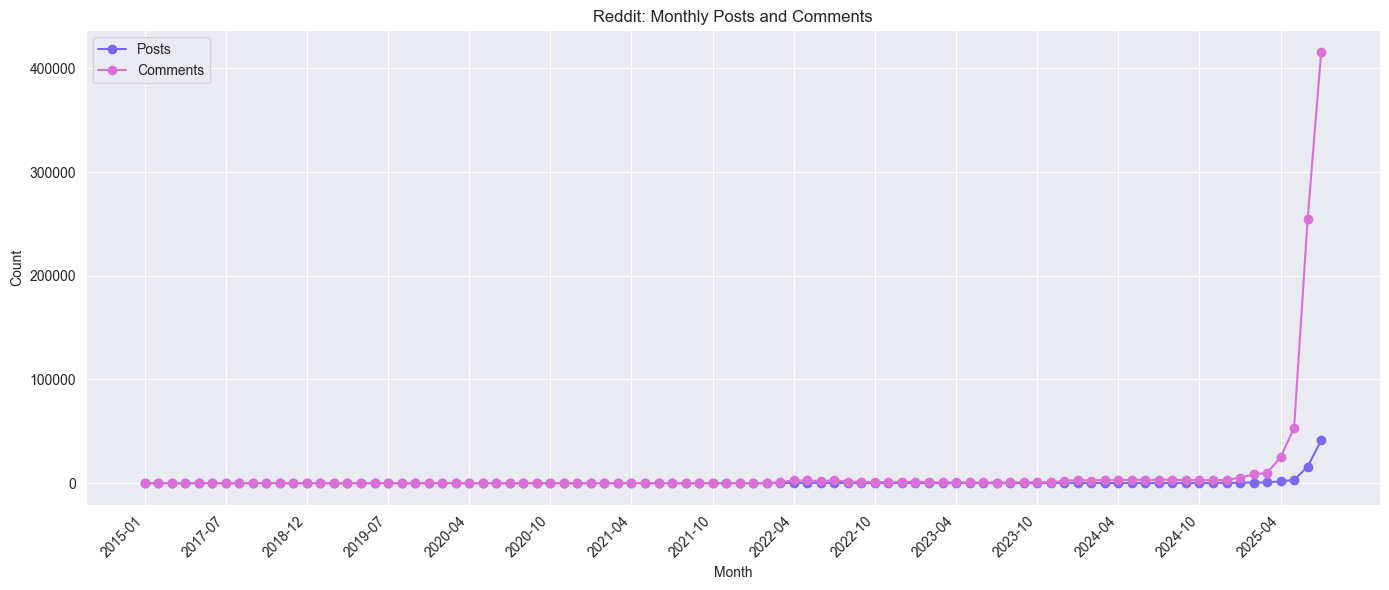

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Load Reddit data
reddit_posts = pd.read_csv("reddit_posts_clean_final.csv")
reddit_comments = pd.read_csv("reddit_comments_clean_final.csv")

# Convert to datetime
reddit_posts['date'] = pd.to_datetime(reddit_posts['date'], errors='coerce')
reddit_comments['date'] = pd.to_datetime(reddit_comments['date'], errors='coerce')

# Group by month
posts_monthly = reddit_posts.groupby(reddit_posts['date'].dt.to_period('M')).size()
comments_monthly = reddit_comments.groupby(reddit_comments['date'].dt.to_period('M')).size()

# Get union of all months
all_months = posts_monthly.index.union(comments_monthly.index).sort_values()

# Reindex both series so they align
posts_monthly = posts_monthly.reindex(all_months, fill_value=0)
comments_monthly = comments_monthly.reindex(all_months, fill_value=0)

# Prepare x-axis ticks (every 6th month)
N = 6
months = all_months.astype(str)
xticks_pos = range(0, len(months), N)

plt.figure(figsize=(14,6))
plt.plot(months, posts_monthly.values, label='Posts', marker='o', color='mediumslateblue')
plt.plot(months, comments_monthly.values, label='Comments', marker='o', color='orchid')
plt.title('Reddit: Monthly Posts and Comments')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(ticks=xticks_pos, labels=[months[i] for i in xticks_pos], rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()